<a href="https://colab.research.google.com/github/Badar-Islam/WalMart/blob/main/WalMart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b>Business Problem</b>
The Management team at Walmart Inc. wants to analyze the customer purchase behavior (specifically, purchase amount) against the customer’s gender and the various other factors to help the business make better decisions. They want to understand if the spending habits differ between male and female customers: Do women spend more on Black Friday than men? (Assume 50 million customers are male and 50 million are female).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from scipy.stats import norm, kstest
import statsmodels.api as sm
from scipy import stats

In [ ]:
!wget --no-check-certificate https://drive.google.com/uc?id=1IYxRDACUDQKxTEjeahDQ8EGmL4fd5Bed -O walmart_data.csv

#https://drive.google.com/file/d/1IYxRDACUDQKxTEjeahDQ8EGmL4fd5Bed/view?usp=drive_link

--2024-05-12 07:54:13--  https://drive.google.com/uc?id=1IYxRDACUDQKxTEjeahDQ8EGmL4fd5Bed
Resolving drive.google.com (drive.google.com)... 173.194.195.101, 173.194.195.139, 173.194.195.102, ...
Connecting to drive.google.com (drive.google.com)|173.194.195.101|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1IYxRDACUDQKxTEjeahDQ8EGmL4fd5Bed [following]
--2024-05-12 07:54:13--  https://drive.usercontent.google.com/download?id=1IYxRDACUDQKxTEjeahDQ8EGmL4fd5Bed
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 108.177.120.132, 2607:f8b0:4001:c18::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|108.177.120.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23027994 (22M) [application/octet-stream]
Saving to: ‘walmart_data.csv’

walmart_data.csv    100%[===================>]  21.96M  67.6MB/s    in 0.3s    

2024-05-12 07:54:17 (67

In [ ]:
df = pd.read_csv("walmart_data.csv")
df.head()

User_ID Product_ID Gender   Age  Occupation City_Category  \
0  1000001  P00069042      F  0-17          10             A   
1  1000001  P00248942      F  0-17          10             A   
2  1000001  P00087842      F  0-17          10             A   
3  1000001  P00085442      F  0-17          10             A   
4  1000002  P00285442      M   55+          16             C   

  Stay_In_Current_City_Years  Marital_Status  Product_Category  Purchase  
0                          2               0                 3      8370  
1                          2               0                 1     15200  
2                          2               0                12      1422  
3                          2               0                12      1057  
4                         4+               0                 8      7969

In [ ]:
df.shape

(550068, 10)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


### Insights:
User_ID and Marital_Status both are categorical data,and so is Product_Category, needs to be type-casted to object.

In [ ]:
df['User_ID'] = df['User_ID'].astype('object')
df['Marital_Status'] = df['Marital_Status'].astype('object')
df['Product_Category'] = df['Product_Category'].astype('object')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  object
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  object
 8   Product_Category            550068 non-null  object
 9   Purchase                    550068 non-null  int64 
dtypes: int64(2), object(8)
memory usage: 42.0+ MB


In [ ]:
df.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

### Insights:
There are no null values.

In [ ]:
df.duplicated().sum()

0

### Insights:
There are no duplicate records.

In [ ]:
df.nunique()

User_ID                        5891
Product_ID                     3631
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category                 20
Purchase                      18105
dtype: int64

## Insights:
Even though the total number of records are more than half a million, we can only see number of unique user ids as 5891, which basically means muliplt visits by the users in order to buy the products.

### Let's look further into this data based on user ids:

In [ ]:
grouped_df = df.groupby('Gender')['User_ID'].nunique()
grouped_df

Gender
F    1666
M    4225
Name: User_ID, dtype: int64

In [ ]:
print(f"Females are {round(100*grouped_df.F/df['User_ID'].nunique(), 2)}% in given data")
print(f"Males are {round(100*grouped_df.M/df['User_ID'].nunique(), 2)}% in given data")

Females are 28.28% in given data
Males are 71.72% in given data


In [ ]:
grouped_df = df.groupby('Age')['User_ID'].nunique()
grouped_df

Age
0-17      218
18-25    1069
26-35    2053
36-45    1167
46-50     531
51-55     481
55+       372
Name: User_ID, dtype: int64

In [ ]:
grouped_df = df.groupby('City_Category')['User_ID'].nunique()
grouped_df

City_Category
A    1045
B    1707
C    3139
Name: User_ID, dtype: int64

In [ ]:
grouped_df = df.groupby('Stay_In_Current_City_Years')['User_ID'].nunique()
grouped_df

Stay_In_Current_City_Years
0      772
1     2086
2     1145
3      979
4+     909
Name: User_ID, dtype: int64

In [ ]:
grouped_df = df.groupby('Marital_Status')['User_ID'].nunique()
grouped_df

Marital_Status
0    3417
1    2474
Name: User_ID, dtype: int64

### Insights:
- Customers are mostly in the range of **26-35 years** (**2k+ unique customers**), followed by 36-45 and 18-25 age ranges (**both 1k+ unique customers**).
- Highest number of users live in **City category - C** (**3k+ unique customers**).
- Customers mostly living in their current city as of 1 year (**2k+ unique**).
- There are **more unmarried customers** than married in the given dataset.

In [ ]:
df.describe().T

count         mean          std   min     25%     50%      75%  \
Occupation  550068.0     8.076707     6.522660   0.0     2.0     7.0     14.0   
Purchase    550068.0  9263.968713  5023.065394  12.0  5823.0  8047.0  12054.0   

                max  
Occupation     20.0  
Purchase    23961.0

In [ ]:
df.describe(include='object').T

count unique        top    freq
User_ID                     550068   5891    1001680    1026
Product_ID                  550068   3631  P00265242    1880
Gender                      550068      2          M  414259
Age                         550068      7      26-35  219587
City_Category               550068      3          B  231173
Stay_In_Current_City_Years  550068      5          1  193821
Marital_Status              550068      2          0  324731
Product_Category            550068     20          5  150933

In [ ]:
df.groupby('Gender')['Purchase'].describe()

count         mean          std   min     25%     50%      75%  \
Gender                                                                      
F       135809.0  8734.565765  4767.233289  12.0  5433.0  7914.0  11400.0   
M       414259.0  9437.526040  5092.186210  12.0  5863.0  8098.0  12454.0   

            max  
Gender           
F       23959.0  
M       23961.0

In [ ]:
df.groupby('Age')['Purchase'].describe()

count         mean          std   min     25%     50%      75%  \
Age                                                                        
0-17    15102.0  8933.464640  5111.114046  12.0  5328.0  7986.0  11874.0   
18-25   99660.0  9169.663606  5034.321997  12.0  5415.0  8027.0  12028.0   
26-35  219587.0  9252.690633  5010.527303  12.0  5475.0  8030.0  12047.0   
36-45  110013.0  9331.350695  5022.923879  12.0  5876.0  8061.0  12107.0   
46-50   45701.0  9208.625697  4967.216367  12.0  5888.0  8036.0  11997.0   
51-55   38501.0  9534.808031  5087.368080  12.0  6017.0  8130.0  12462.0   
55+     21504.0  9336.280459  5011.493996  12.0  6018.0  8105.5  11932.0   

           max  
Age             
0-17   23955.0  
18-25  23958.0  
26-35  23961.0  
36-45  23960.0  
46-50  23960.0  
51-55  23960.0  
55+    23960.0

In [ ]:
df.groupby('City_Category')['Purchase'].describe()

count         mean          std   min     25%     50%  \
City_Category                                                             
A              147720.0  8911.939216  4892.115238  12.0  5403.0  7931.0   
B              231173.0  9151.300563  4955.496566  12.0  5460.0  8005.0   
C              171175.0  9719.920993  5189.465121  12.0  6031.5  8585.0   

                   75%      max  
City_Category                    
A              11786.0  23961.0  
B              11986.0  23960.0  
C              13197.0  23961.0

In [ ]:
df.groupby('Stay_In_Current_City_Years')['Purchase'].describe()

count         mean          std   min     25%  \
Stay_In_Current_City_Years                                                     
0                            74398.0  9180.075123  4990.479940  12.0  5480.0   
1                           193821.0  9250.145923  5027.476933  12.0  5500.0   
2                           101838.0  9320.429810  5044.588224  12.0  5846.0   
3                            95285.0  9286.904119  5020.343541  12.0  5832.0   
4+                           84726.0  9275.598872  5017.627594  12.0  5844.0   

                               50%      75%      max  
Stay_In_Current_City_Years                            
0                           8025.0  11990.0  23960.0  
1                           8041.0  12042.0  23961.0  
2                           8072.0  12117.0  23961.0  
3                           8047.0  12075.0  23961.0  
4+                          8052.0  12038.0  23958.0

In [ ]:
df.groupby('Marital_Status')['Purchase'].describe()

count         mean          std   min     25%     50%  \
Marital_Status                                                             
0               324731.0  9265.907619  5027.347859  12.0  5605.0  8044.0   
1               225337.0  9261.174574  5016.897378  12.0  5843.0  8051.0   

                    75%      max  
Marital_Status                    
0               12061.0  23961.0  
1               12042.0  23961.0

In [ ]:
df.groupby('Product_Category')['Purchase'].describe()

count          mean          std     min       25%  \
Product_Category                                                          
1                 140378.0  13606.218596  4298.834894  3790.0  11546.00   
2                  23864.0  11251.935384  3570.642713  3176.0   9645.75   
3                  20213.0  10096.705734  2824.626957  2638.0   8198.00   
4                  11753.0   2329.659491   812.540292   684.0   2058.00   
5                 150933.0   6240.088178  1909.091687  1713.0   5242.00   
6                  20466.0  15838.478550  4011.233690  3981.0  12505.00   
7                   3721.0  16365.689600  4174.554105  4061.0  12848.00   
8                 113925.0   7498.958078  2013.015062  1939.0   6036.00   
9                    410.0  15537.375610  5330.847116  4528.0  13583.50   
10                  5125.0  19675.570927  4225.721898  4624.0  18546.00   
11                 24287.0   4685.268456  1834.901184  1472.0   3131.00   
12                  3947.0   1350.859894   362.510258   342.0   1071.00   
13                  5549.0    722.400613   183.493126   185.0    578.00   
14                  1523.0  13141.625739  4069.009293  3657.0  11097.00   
15                  6290.0  14780.451828  5175.465852  4148.0  12523.25   
16                  9828.0  14766.037037  4360.213198  4036.0  12354.00   
17                   578.0  10170.759516  2333.993073  2616.0   8063.50   
18                  3125.0   2972.864320   727.051652   754.0   2359.00   
19                  1603.0     37.041797    16.869148    12.0     24.00   
20                  2550.0    370.481176   167.116975   118.0    242.00   

                      50%       75%      max  
Product_Category                              
1                 15245.0  15812.00  19708.0  
2                 12728.5  13212.00  16504.0  
3                 10742.0  13211.00  13717.0  
4                  2175.0   2837.00   3556.0  
5                  6912.0   7156.00   8907.0  
6                 16312.0  20051.00  20690.0  
7                 16700.0  20486.00  21080.0  
8                  7905.0   9722.00  10082.0  
9                 14388.5  18764.00  23531.0  
10                19197.0  23438.00  23961.0  
11                 4611.0   6058.00   7654.0  
12                 1401.0   1723.00   1778.0  
13                  755.0    927.00    962.0  
14                14654.0  15176.50  18931.0  
15                16660.0  20745.75  21569.0  
16                16292.5  16831.00  20971.0  
17                10435.5  12776.75  13264.0  
18                 3071.0   3769.00   3900.0  
19                   37.0     50.00     62.0  
20                  368.0    490.00    613.0

### Insights:
- There are more single people than married people.
- Most mall customers are between the ages of 26 and 35.
- The majority of our customers come from city category B but customers come from **City category C spent more** as mean is 9719.
- **Male customers tend to spend more** than female customers, as the mean is higher for male customers.

## Outliers Handling:

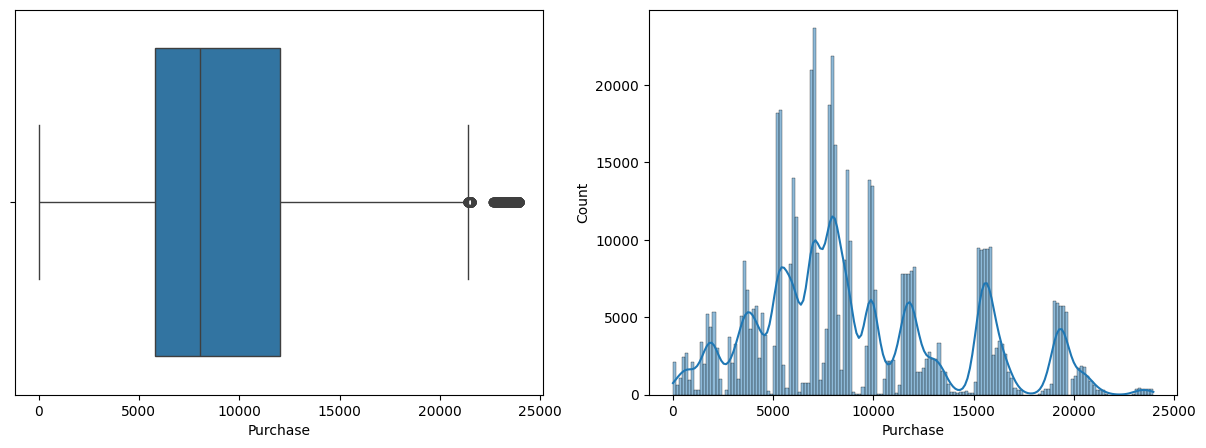

In [ ]:
fig = plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(df['Purchase'], orient='h')
plt.subplot(1,2,2)
sns.histplot(df['Purchase'], kde=True)
plt.show()

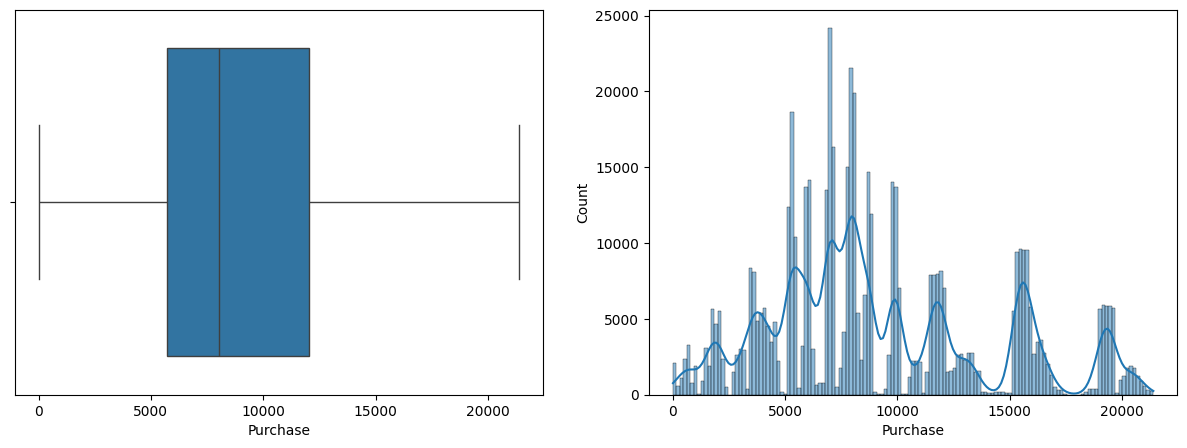

In [ ]:
df_v1 = df.copy()
q3 = df_v1['Purchase'].quantile(0.75)
q1 = df_v1['Purchase'].quantile(0.25)
IQR = q3-q1
df_v1 = df_v1[(df_v1['Purchase'] > (q1-1.5*IQR)) & (df_v1['Purchase']< (q3+1.5*IQR))]

fig = plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(df_v1['Purchase'], orient='h')
plt.subplot(1,2,2)
sns.histplot(df_v1['Purchase'], kde=True)
plt.show()

## <b>Visual Analysis:</b>

### Univariate Analysis:

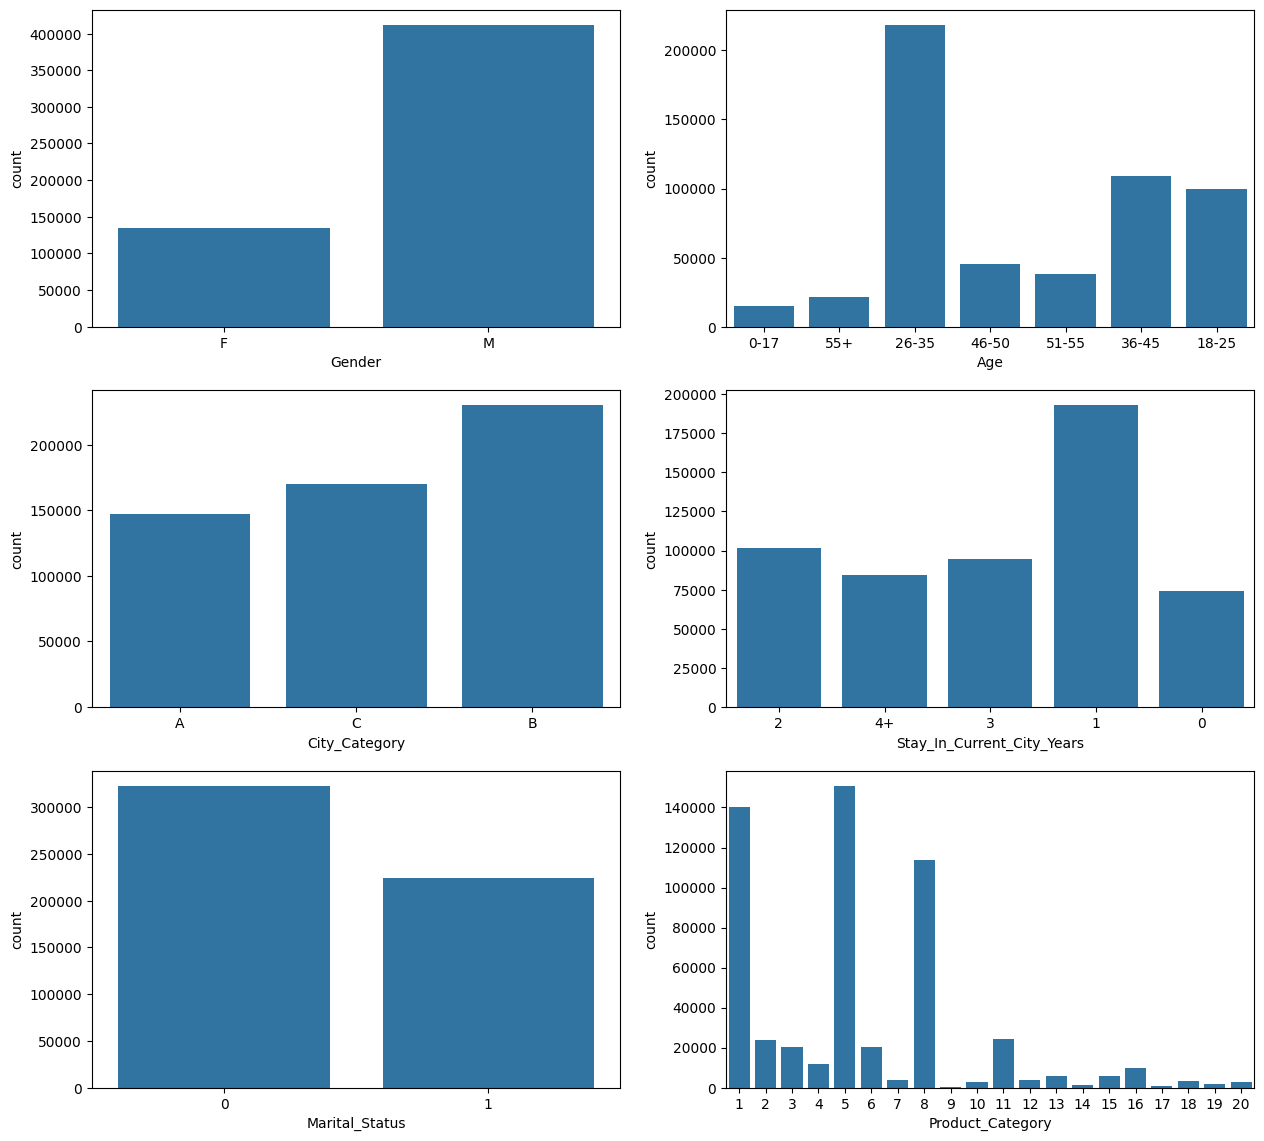

In [ ]:
col_cat = df_v1.describe(include='object').columns
fig, ax = plt.subplots(3, 2, figsize=(15,14))
ax = ax.flatten()
for i in range(2, len(col_cat)):
  sns.countplot(x=df_v1[col_cat[i]], ax=ax[i-2])
plt.show()

### Bi-Variate Analysis:

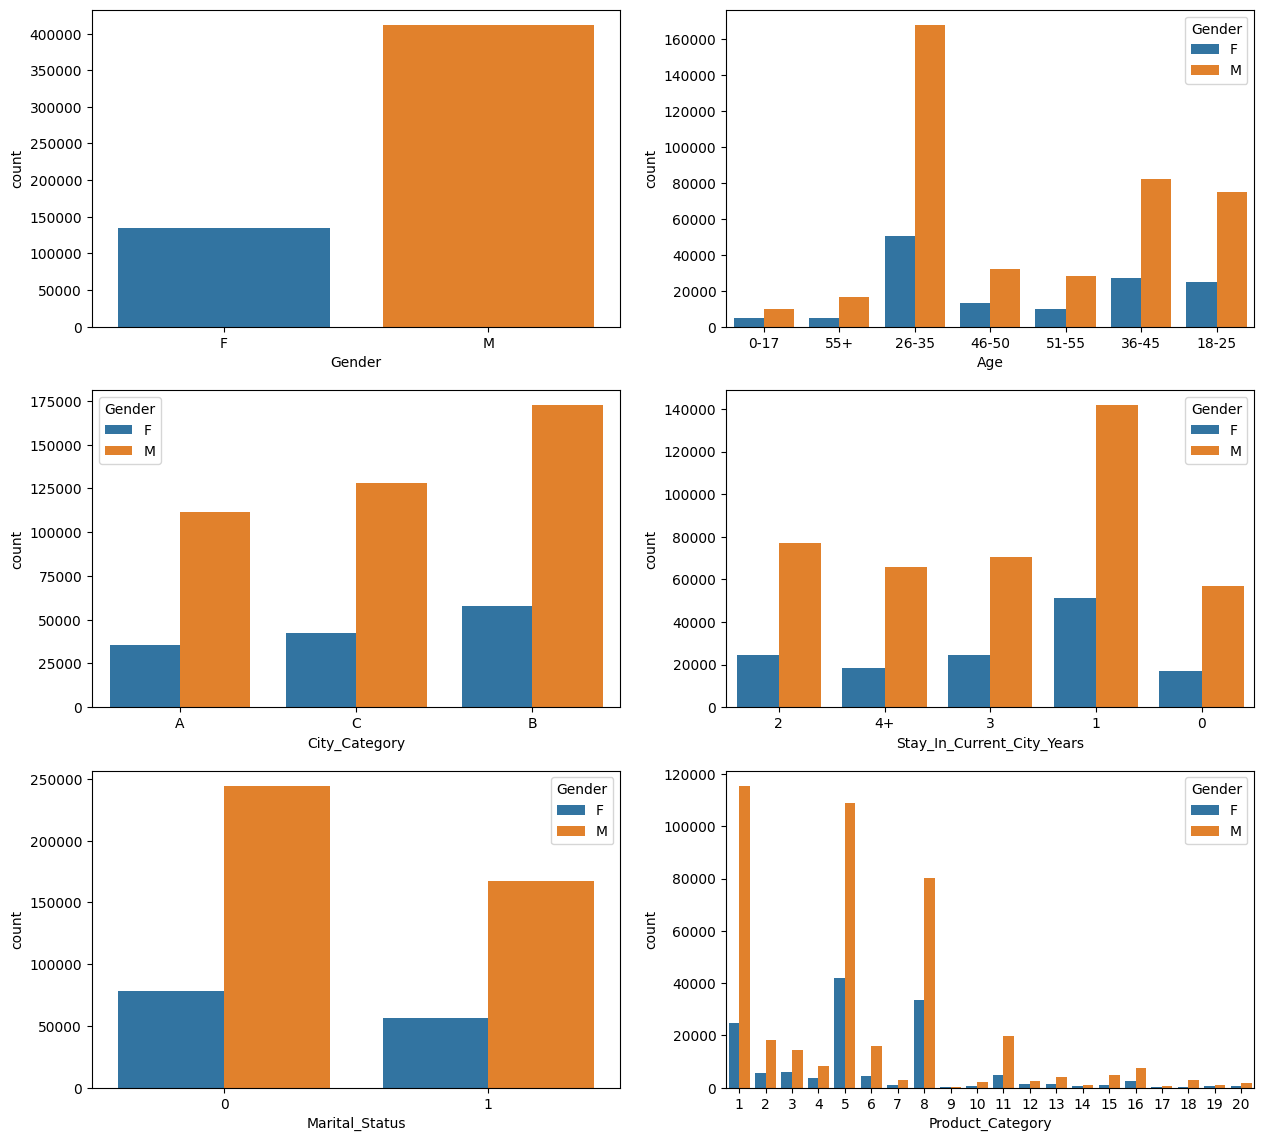

In [ ]:
col_cat = df_v1.describe(include='object').columns
fig, ax = plt.subplots(3, 2, figsize=(15,14))
ax = ax.flatten()
for i in range(2, len(col_cat)):
  sns.countplot(x=df_v1[col_cat[i]], ax=ax[i-2], hue=df_v1['Gender'])
plt.show()

### Insights:
- Males has done more shopping than Female customers.
- Males and Females are mostly in the range of 26-35 years, followed by 36-45 and 18-25 age ranges.
- Most shoppings are done in **city-category - B**.
- Single customers have done more shopping among both genders.
- **Males** buy more product from category - **1, followed by 5 and 8** whereas **Females** buy more from category - **5, followed by 8 and 1**.

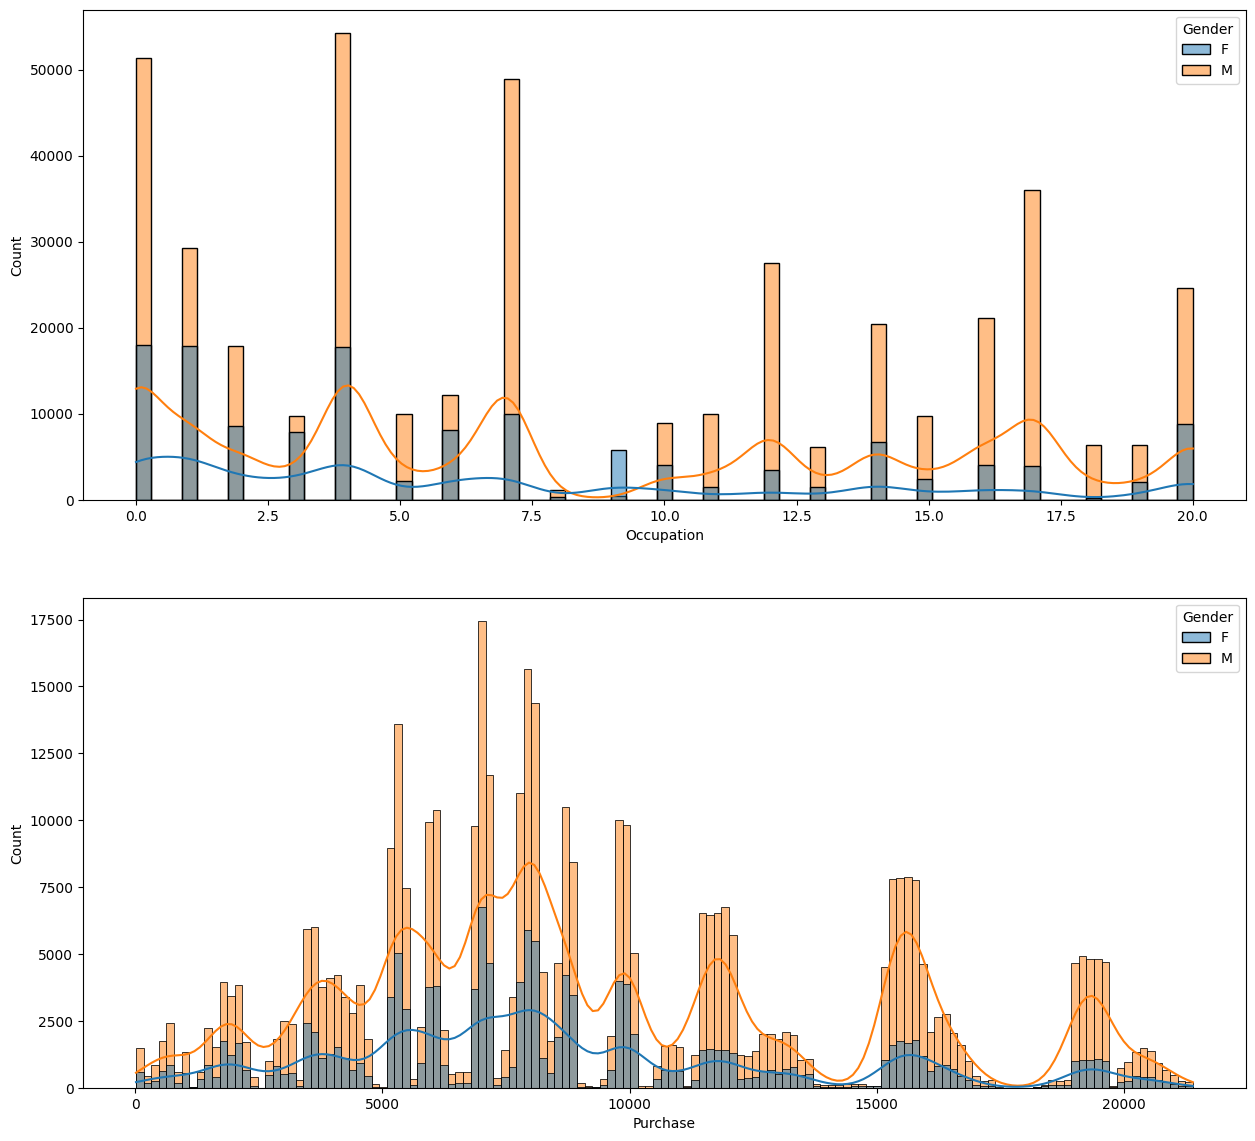

In [ ]:
col_cat = df_v1.describe().columns
fig, ax = plt.subplots(2, 1, figsize=(15,14))
ax = ax.flatten()
for i in range(len(col_cat)):
  sns.histplot(x=df_v1[col_cat[i]], hue=df_v1['Gender'], ax=ax[i], kde=True)
plt.show()

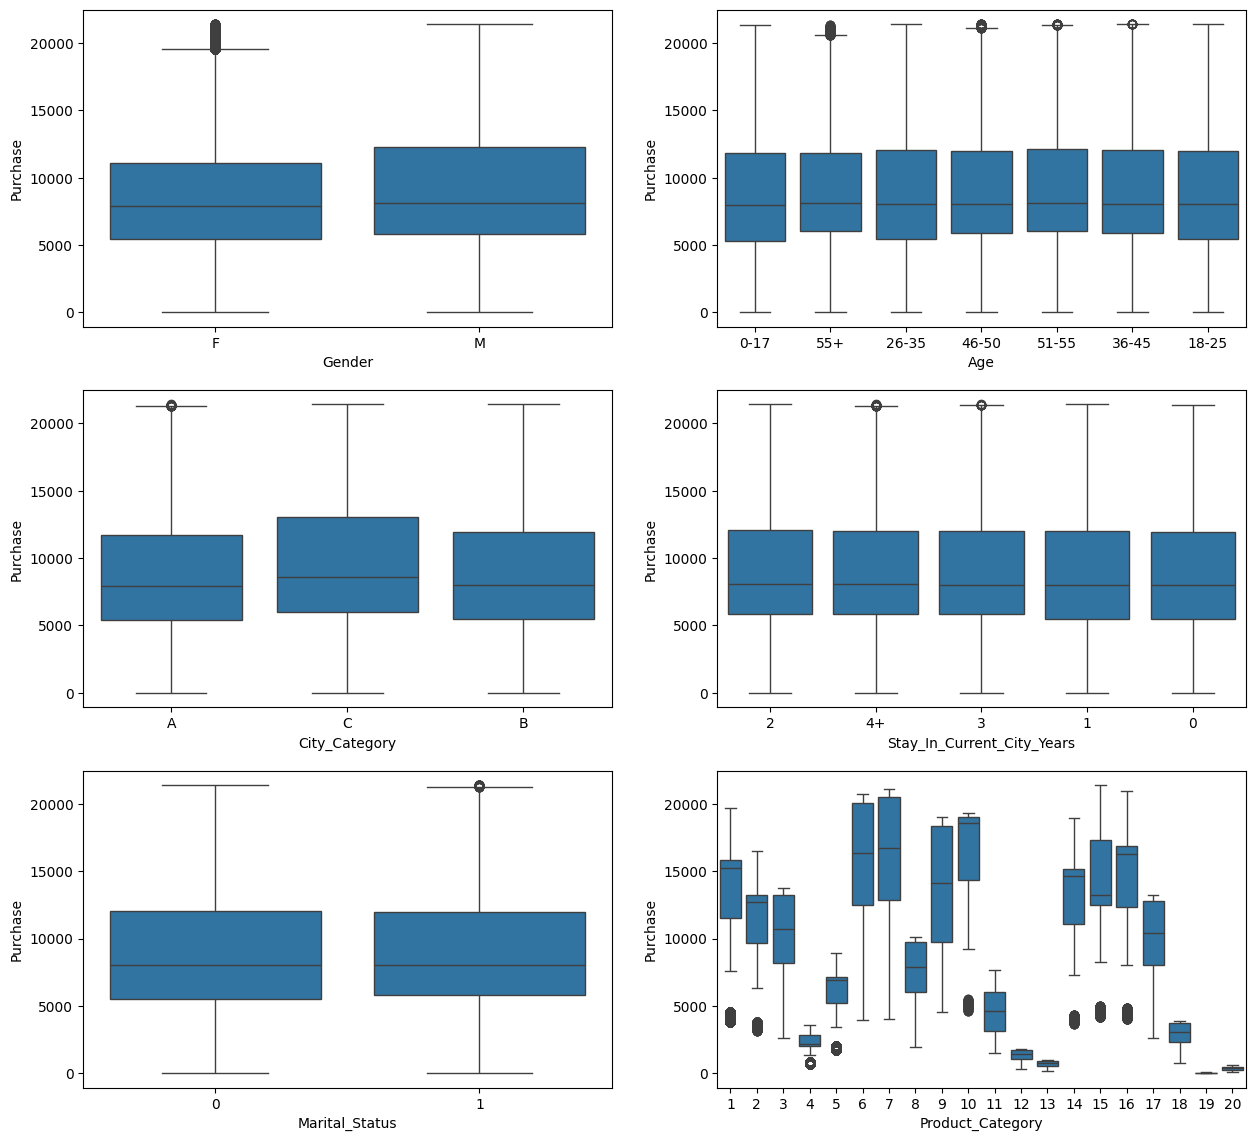

In [ ]:
col_cat = df_v1.describe(include='object').columns
fig, ax = plt.subplots(3, 2, figsize=(15,14))
ax = ax.flatten()
for i in range(2, len(col_cat)):
  sns.boxplot(x=df_v1[col_cat[i]], y=df_v1['Purchase'], ax=ax[i-2])
plt.show()

### Multi-Variate Analysis:

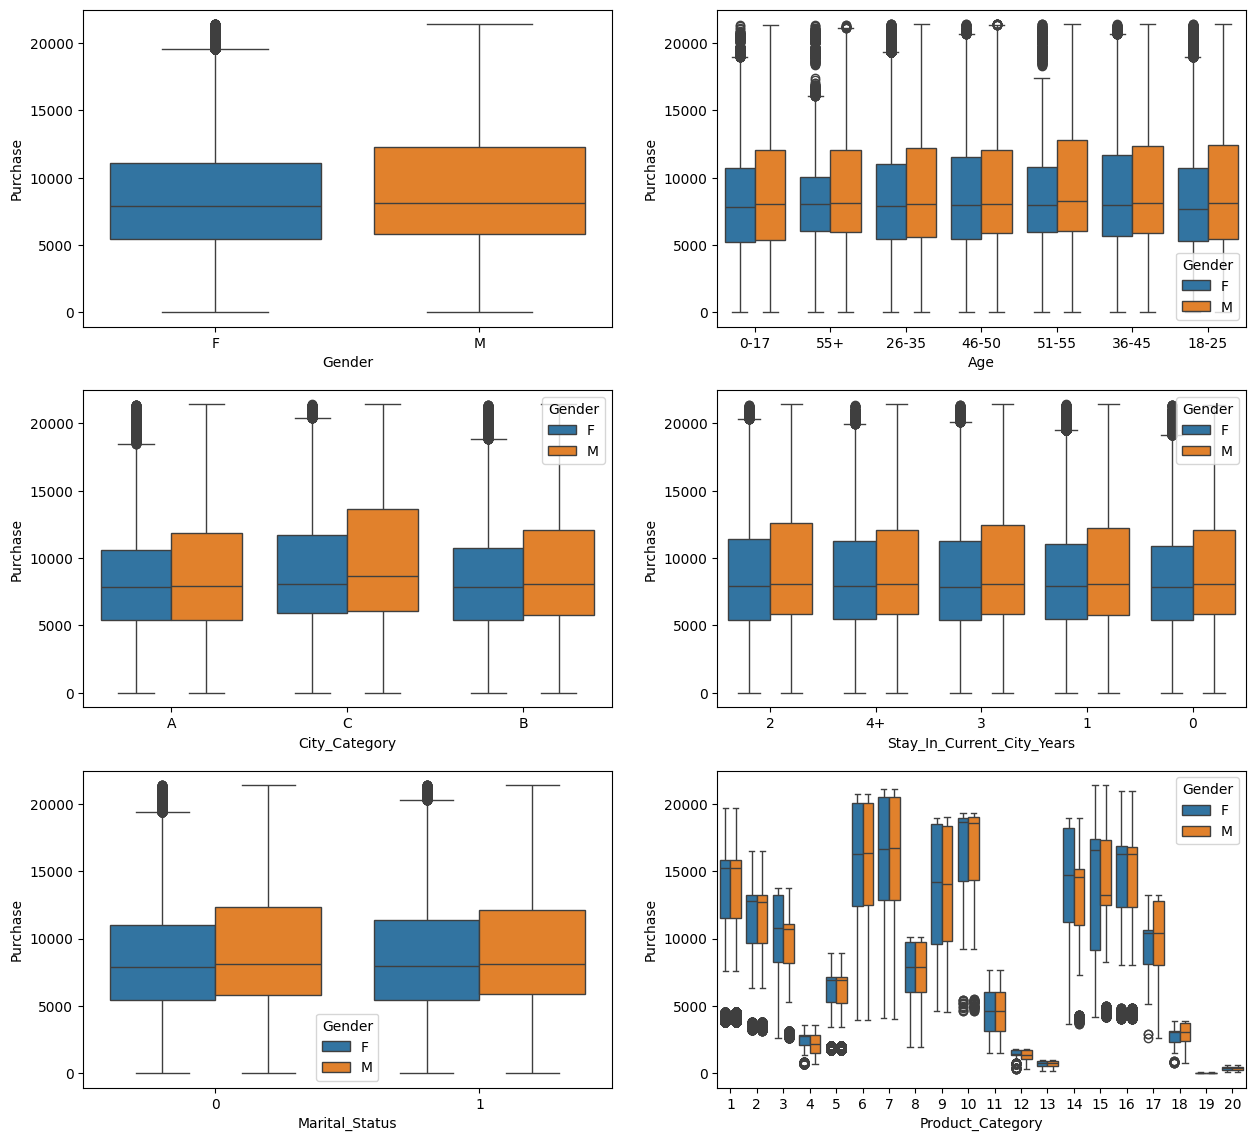

In [ ]:
col_cat = df_v1.describe(include='object').columns
fig, ax = plt.subplots(3, 2, figsize=(15,14))
ax = ax.flatten()
for i in range(2, len(col_cat)):
  sns.boxplot(x=df_v1[col_cat[i]], y=df_v1['Purchase'], ax=ax[i-2], hue=df_v1['Gender'])
plt.show()

### Insights:
We could see more outliers for females, which means there are females which spents a lot when compared to the individuals of same categories regardless of Age, City-Category, Year of stays, and Marital Status.

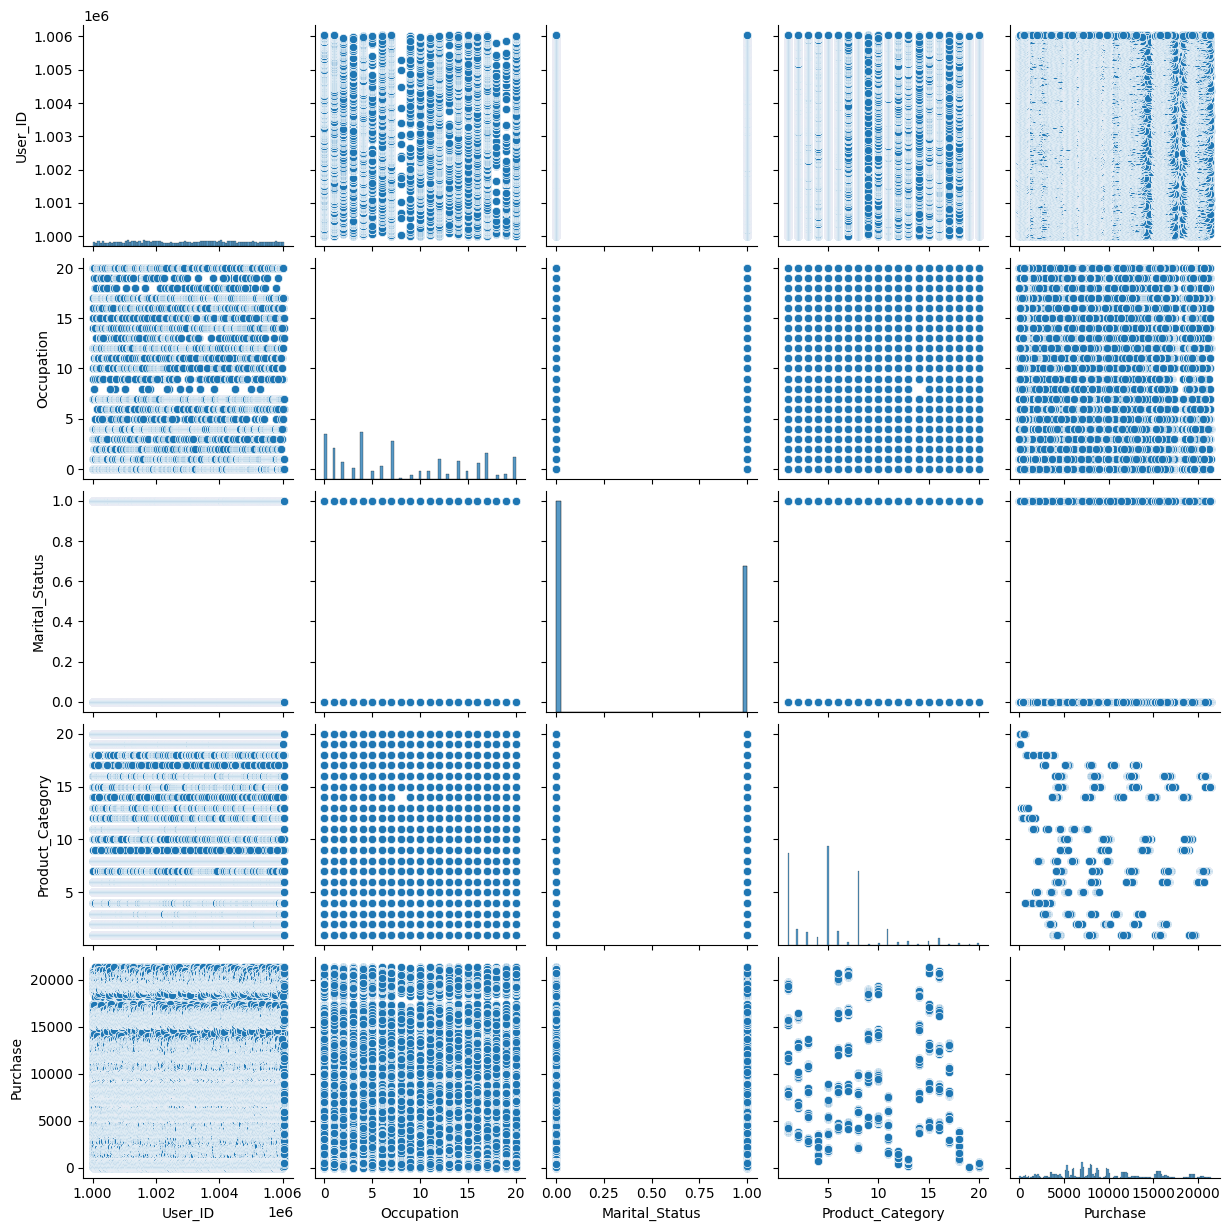

In [ ]:
sns.pairplot(df_v1)
plt.show()

<Axes: >

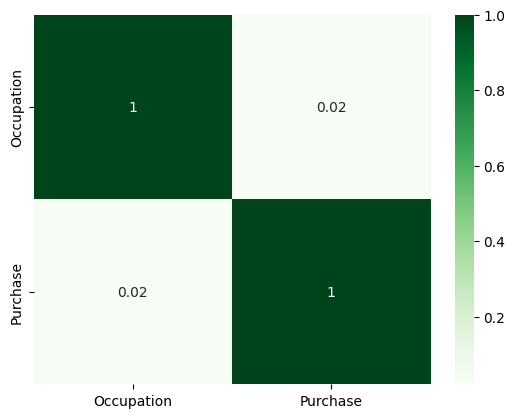

In [ ]:
sns.heatmap(df_v1.corr(numeric_only=True), annot=True, cmap='Greens')

### Insights:
There are not much correlations that can be observed by the graph.

## Central Limit Theorem:
The central limit theorem states that the sampling distribution of a sample mean is approximately normal if the sample size is large enough, even if the population distribution is not normal.

### How does gender affect the amount spent?

In [ ]:
males_purchase = df_v1[df_v1['Gender']=='M']['Purchase']
female_purchase = df_v1[df_v1['Gender']=='F']['Purchase']

In [ ]:
males_purchase.shape

(412171,)

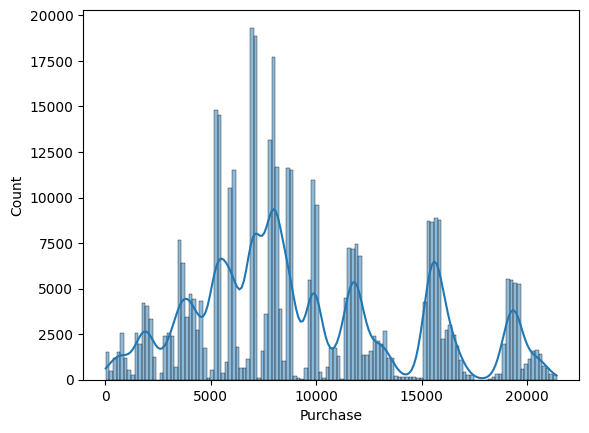

In [ ]:
sns.histplot(males_purchase, kde=True)
plt.show()

In [ ]:
def bootstrapping_gender(samp1, samp2, sample_size, iteration_size, confidence_level, no_of_tail):
  samp1_means = np.empty(iteration_size)
  samp2_means = np.empty(iteration_size)
  for i in range(iteration_size):
    samp1_n = np.empty(i)
    samp2_n = np.empty(i)
    samp1_n = np.random.choice(samp1, size=sample_size, replace=True)
    samp2_n = np.random.choice(samp2, size=sample_size, replace=True)
    samp1_means[i] = np.mean(samp1_n)
    samp2_means[i] = np.mean(samp2_n)

  alpha = (1-confidence_level)/no_of_tail
  z_critical = norm.ppf(1-alpha)

  mean1 = np.mean(samp1_means)
  std1 = np.std(samp1_means)
  sem1 = stats.sem(samp1_means)
  lower_limit1 = mean1 - (std1 * z_critical)
  upper_limit1 = mean1 + (std1 * z_critical)

  mean2 = np.mean(samp2_means)
  std2 = np.std(samp2_means)
  sem2 = stats.sem(samp2_means)
  lower_limit2 = mean2 - (std2 * z_critical)
  upper_limit2 = mean2 + (std2 * z_critical)

  fig, ax = plt.subplots(figsize=(10,6))
  sns.set_style("darkgrid")
  sns.kdeplot(data=samp1_means, color='#467821', fill=True, linewidth=2)
  sns.kdeplot(data=samp2_means, color='#e5ae38', fill=True, linewidth=2)

  label_mean1=(f"μ (Males) : {np.round(mean1, 2)}")
  label_ult1=(f"Lower Limit(M): {np.round(lower_limit1, 2)}\nUpper Limit(M): {np.round(upper_limit1, 2)}")
  label_mean2=(f"μ (Females) : {np.round(mean2, 2)}")
  label_ult2=(f"Lower Limit(F): {np.round(lower_limit1, 2)}\nUpper Limit(F): {np.round(upper_limit1, 2)}")

  plt.title(f"Sample Size:{sample_size}, Male Avg:{np.round(mean1, 2)}, Male SEM:{np.round(sem1, 2)}, Female Avg:{np.round(mean2, 2)}, Female SEM:{np.round(sem2, 2)}")
  plt.xlabel("Purchase")
  plt.axvline(mean1, color='y', linestyle='solid', linewidth=2, label=label_mean1)
  plt.axvline(lower_limit1, color='r', linestyle='solid', linewidth=2, label=label_ult1)
  plt.axvline(upper_limit1, color='r', linestyle='solid', linewidth=2)
  plt.axvline(mean2, color='b', linestyle='dashdot', linewidth=2, label=label_mean2)
  plt.axvline(lower_limit2, color='#56B4E9', linestyle='dashdot', linewidth=2, label=label_ult2)
  plt.axvline(upper_limit2, color='#56B4E9', linestyle='dashdot', linewidth=2)
  plt.legend(loc='upper right')
  plt.show()

  return samp1_means, samp2_means, np.round(lower_limit1, 2), np.round(upper_limit1, 2), np.round(lower_limit2, 2), np.round(upper_limit2, 2)

## CLT Analysis for mean purchase with confidence 90% - Based on Gender:


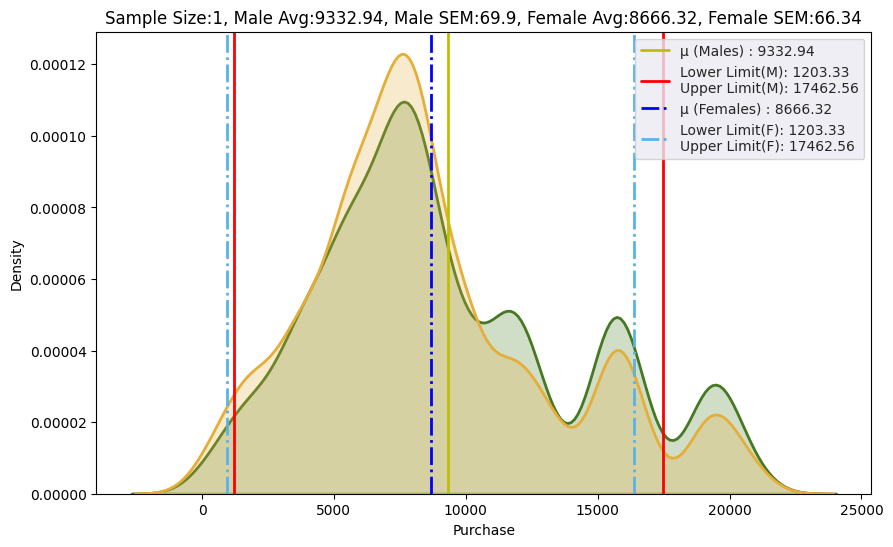

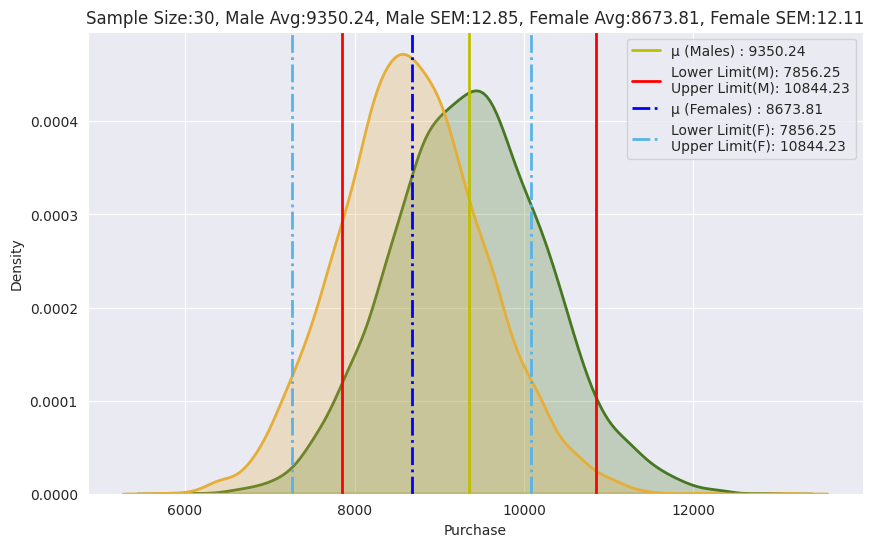

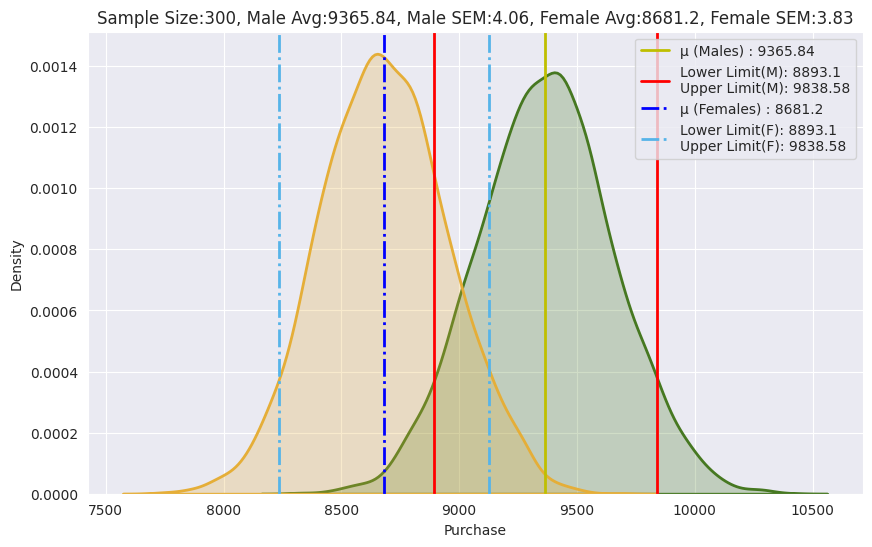

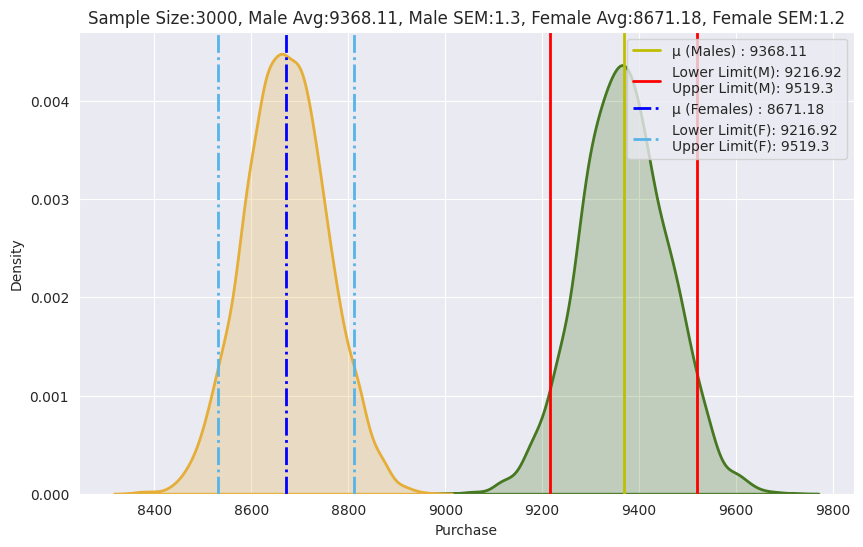

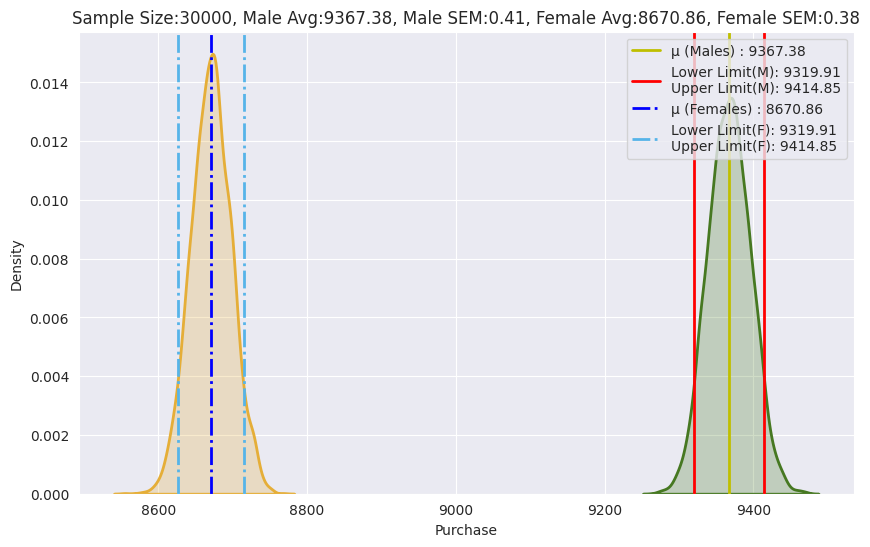

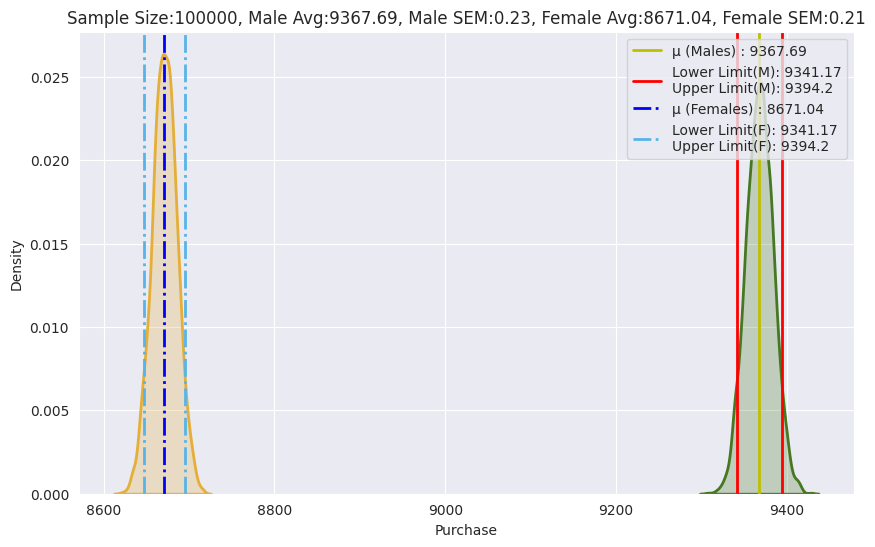

In [ ]:
itr_size = 5000
size_list = [1, 30, 300, 3000, 30000, 100000]
confidence_level = 0.90

array = []

for i in size_list:
    m_avg, f_avg, ll_m, ul_m, ll_f, ul_f = bootstrapping_gender(males_purchase,female_purchase,i,itr_size,confidence_level, 2)

    array.append(['M', ll_m, ul_m, i, ([ll_m,ul_m]) ,(ul_m-ll_m),(confidence_level*100)])
    array.append(['F', ll_f, ul_f, i, ([ll_f,ul_f]) ,(ul_f-ll_f),(confidence_level*100)])

bootstrapped_values = pd.DataFrame(array, columns = ['Gender','Lower_limit','Upper_limit','Sample_Size','CI','Range','Confidence_pct'])
print()

In [ ]:
bootstrapped_values[bootstrapped_values['Gender']=='M']

Gender  Lower_limit  Upper_limit  Sample_Size                   CI  \
0       M      1203.33     17462.56            1  [1203.33, 17462.56]   
2       M      7856.25     10844.23           30  [7856.25, 10844.23]   
4       M      8893.10      9838.58          300    [8893.1, 9838.58]   
6       M      9216.92      9519.30         3000    [9216.92, 9519.3]   
8       M      9319.91      9414.85        30000   [9319.91, 9414.85]   
10      M      9341.17      9394.20       100000    [9341.17, 9394.2]   

       Range  Confidence_pct  
0   16259.23            90.0  
2    2987.98            90.0  
4     945.48            90.0  
6     302.38            90.0  
8      94.94            90.0  
10     53.03            90.0

In [ ]:
bootstrapped_values[bootstrapped_values['Gender']=='F']

Gender  Lower_limit  Upper_limit  Sample_Size                   CI  \
1       F       950.85     16381.78            1   [950.85, 16381.78]   
3       F      7265.33     10082.29           30  [7265.33, 10082.29]   
5       F      8236.21      9126.19          300   [8236.21, 9126.19]   
7       F      8531.35      8811.02         3000   [8531.35, 8811.02]   
9       F      8626.32      8715.39        30000   [8626.32, 8715.39]   
11      F      8646.98      8695.11       100000   [8646.98, 8695.11]   

       Range  Confidence_pct  
1   15430.93            90.0  
3    2816.96            90.0  
5     889.98            90.0  
7     279.67            90.0  
9      89.07            90.0  
11     48.13            90.0

### Insights:
- As the sample size increases significantly, both groups becomes more and more distinct.
- As the sample size increases significantly, Standard Error of the means in samples decreases.
- For the sample size >= 300:
  - With sample_size=300, range of purchase mean for female having 90% confidence interval is [8228.98, 9124.03],  whereas with sample_size=100000, range of purchase mean for female having 90% confidence interval is [8647.82, 8695.44].
  - With sample_size=300, range of purchase mean for male having 90% confidence interval is [8899.61, 9840.02], whereas with sample_size=100000, range of purchase mean for male having 90% confidence interval is [9341.93, 9393.58].

## CLT Analysis for mean purchase with confidence 95% - Based on Gender:


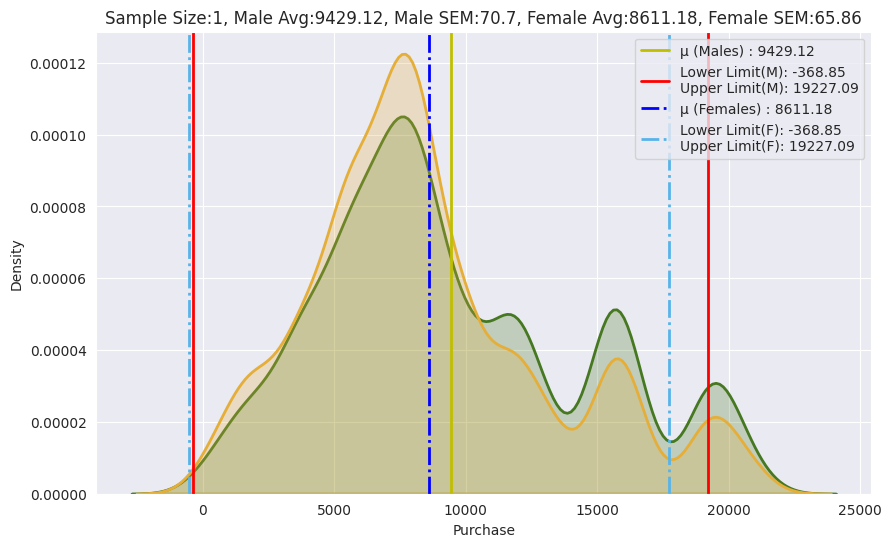

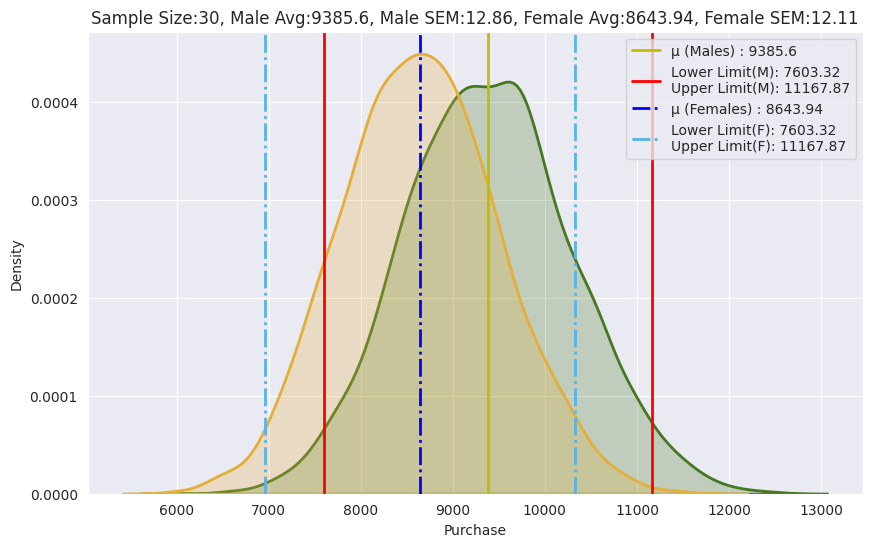

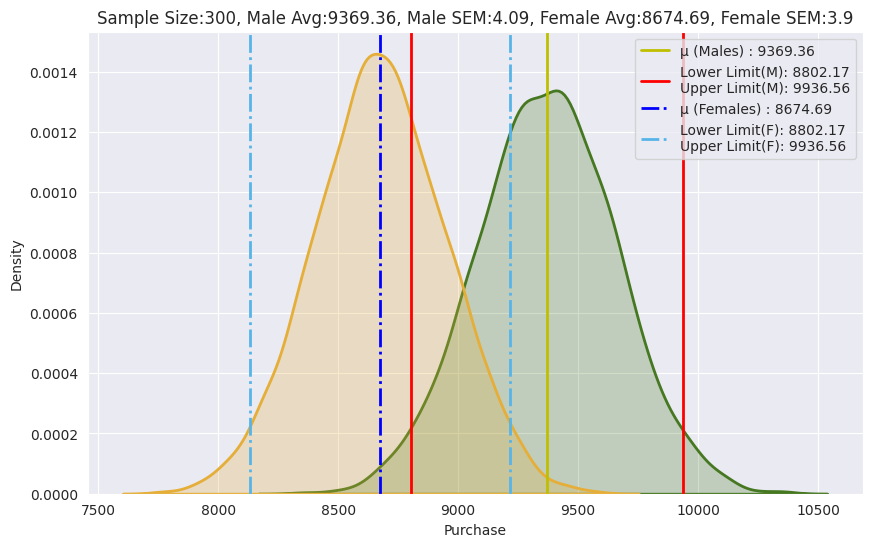

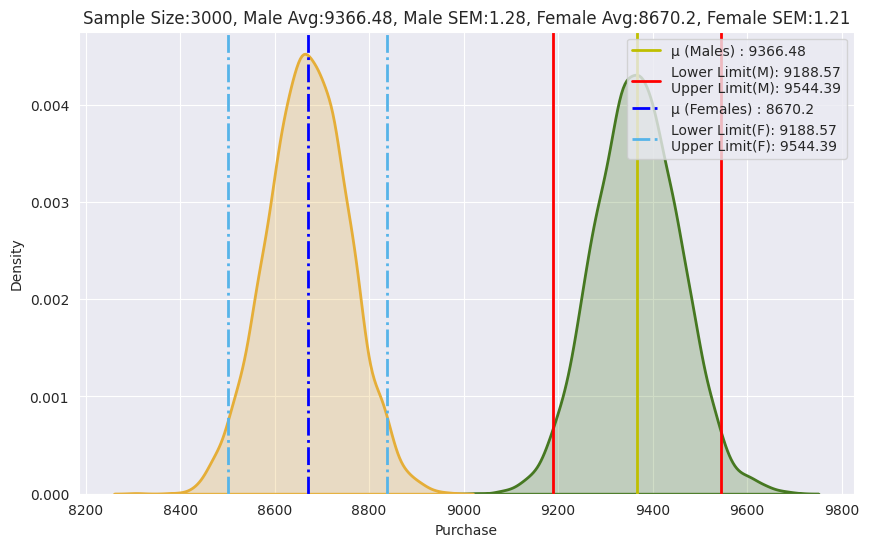

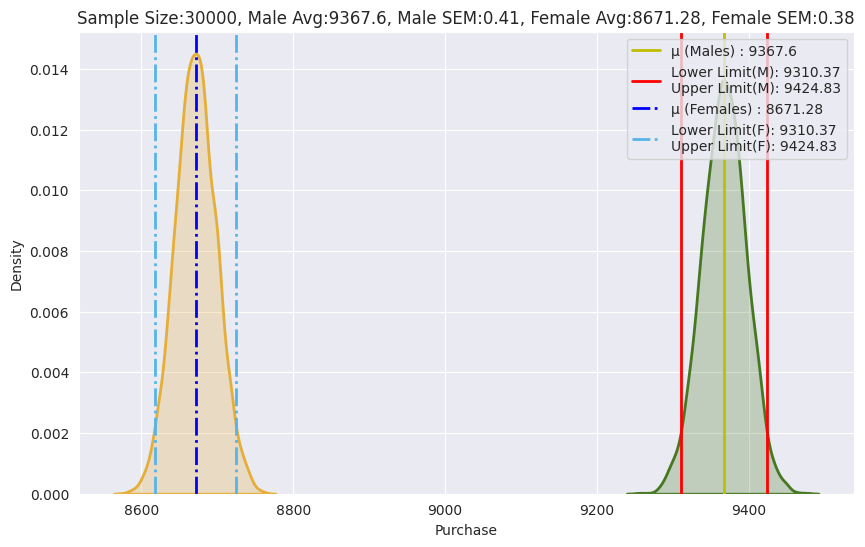

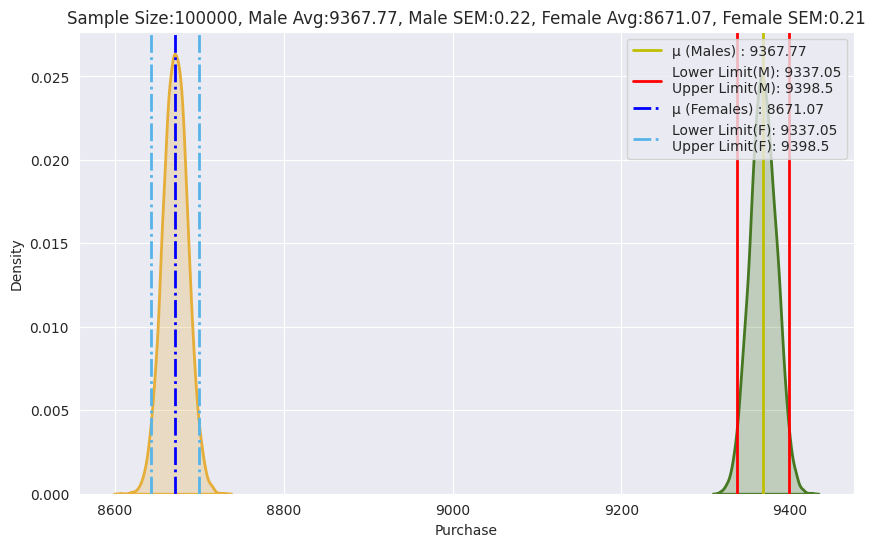

In [ ]:
itr_size = 5000
size_list = [1, 30, 300, 3000, 30000, 100000]
confidence_level = 0.95

array = []

for i in size_list:
    m_avg, f_avg, ll_m, ul_m, ll_f, ul_f = bootstrapping_gender(males_purchase,female_purchase,i,itr_size,confidence_level, 2)

    array.append(['M', ll_m, ul_m, i, ([ll_m,ul_m]) ,(ul_m-ll_m),(confidence_level*100)])
    array.append(['F', ll_f, ul_f, i, ([ll_f,ul_f]) ,(ul_f-ll_f),(confidence_level*100)])

bootstrapped_values_95 = pd.DataFrame(array, columns = ['Gender','Lower_limit','Upper_limit','Sample_Size','CI','Range','Confidence_pct'])
collective = pd.concat([bootstrapped_values, bootstrapped_values_95], axis=0)

In [ ]:
bootstrapped_values_95[bootstrapped_values_95['Gender']=='M']

Gender  Lower_limit  Upper_limit  Sample_Size                   CI  \
0       M      -368.85     19227.09            1  [-368.85, 19227.09]   
2       M      7603.32     11167.87           30  [7603.32, 11167.87]   
4       M      8802.17      9936.56          300   [8802.17, 9936.56]   
6       M      9188.57      9544.39         3000   [9188.57, 9544.39]   
8       M      9310.37      9424.83        30000   [9310.37, 9424.83]   
10      M      9337.05      9398.50       100000    [9337.05, 9398.5]   

       Range  Confidence_pct  
0   19595.94            95.0  
2    3564.55            95.0  
4    1134.39            95.0  
6     355.82            95.0  
8     114.46            95.0  
10     61.45            95.0

In [ ]:
bootstrapped_values_95[bootstrapped_values_95['Gender']=='F']

Gender  Lower_limit  Upper_limit  Sample_Size                   CI  \
1       F      -515.58     17737.94            1  [-515.58, 17737.94]   
3       F      6965.15     10322.73           30  [6965.15, 10322.73]   
5       F      8134.23      9215.15          300   [8134.23, 9215.15]   
7       F      8502.21      8838.19         3000   [8502.21, 8838.19]   
9       F      8618.01      8724.54        30000   [8618.01, 8724.54]   
11      F      8642.27      8699.88       100000   [8642.27, 8699.88]   

       Range  Confidence_pct  
1   18253.52            95.0  
3    3357.58            95.0  
5    1080.92            95.0  
7     335.98            95.0  
9     106.53            95.0  
11     57.61            95.0

### Insights:
- Using confidence interval 95%, the mean purchase value by gender shows a similar pattern to that found with confidence interval 90%.
- As the sample size increases significantly, both groups becomes more and more distinct.
- As the sample size increases significantly, Standard Error of the means in samples decreases.
- For the sample size >= 300:
  - With sample_size=300, range of purchase mean for female having 95% confidence interval is [8143.45, 9200.61],  whereas with sample_size=100000, range of purchase mean for female having 95% confidence interval is [8641.81, 8700.08].
  - With sample_size=300, range of purchase mean for male having 95% confidence interval is [8804.7, 9933.21], whereas with sample_size=100000, range of purchase mean for male having 95% confidence interval is [9336.63, 9398.87].

## CLT Analysis for mean purchase with confidence 99% - Based on Gender:

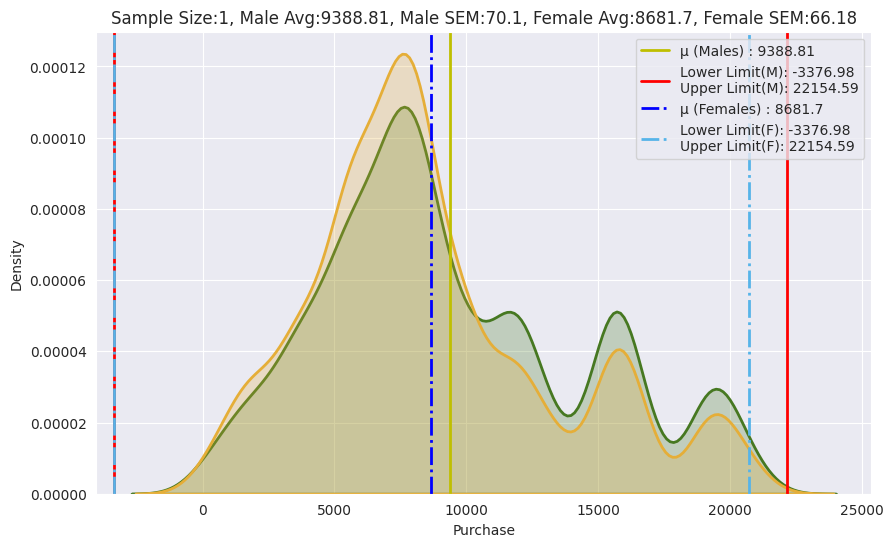

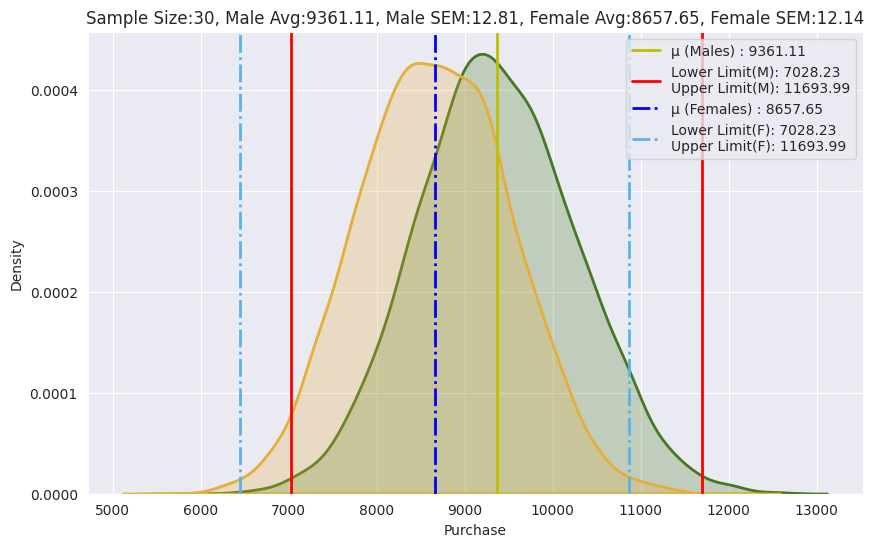

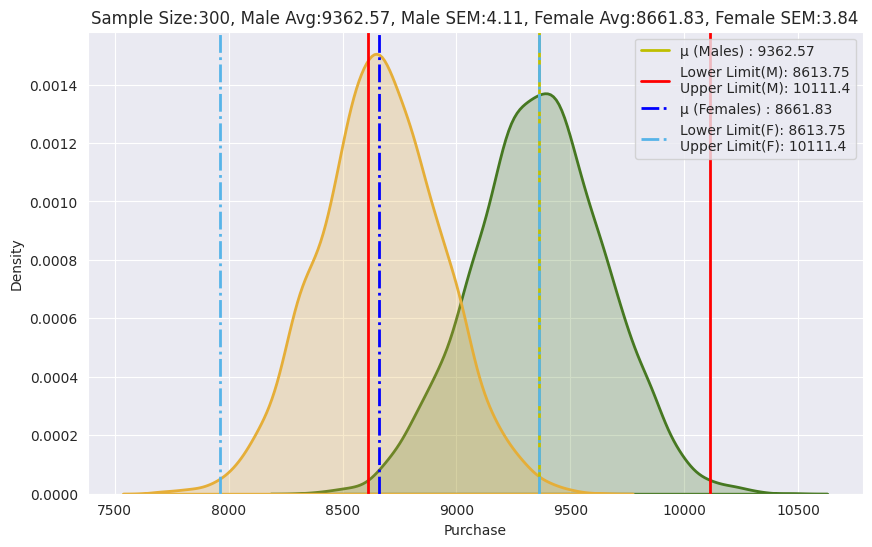

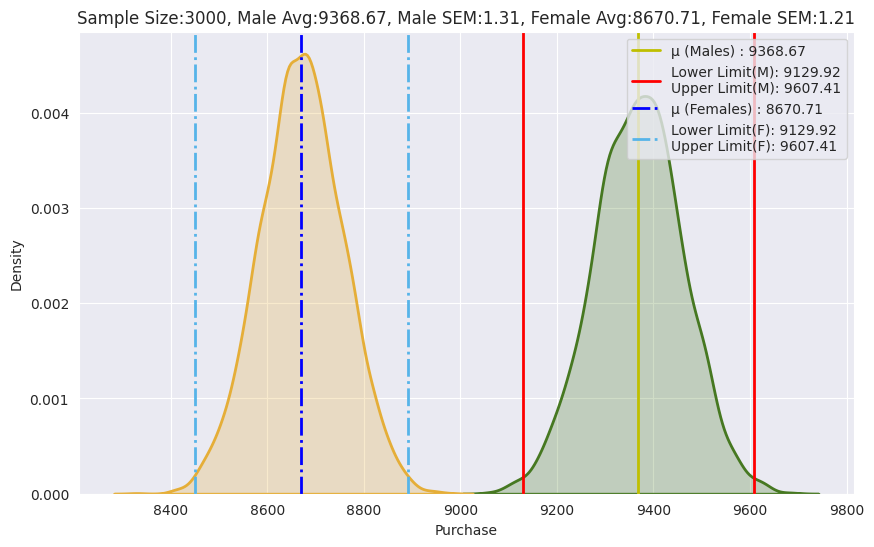

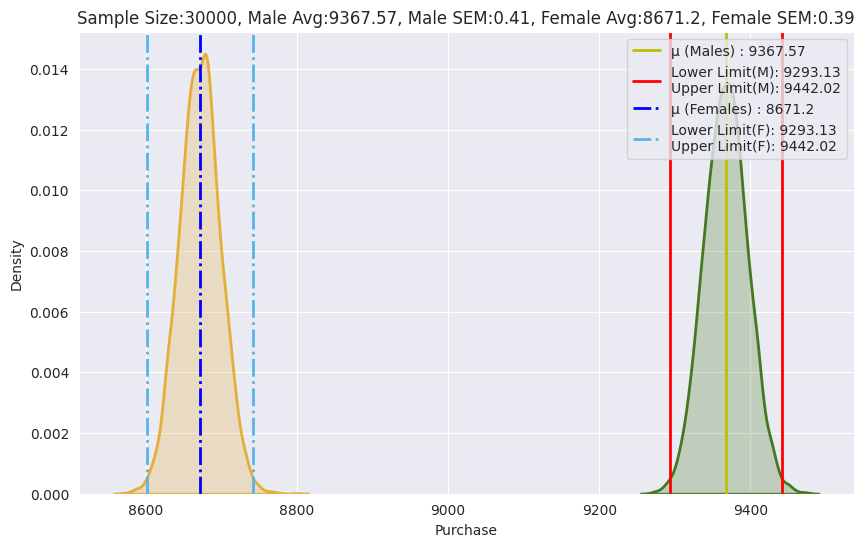

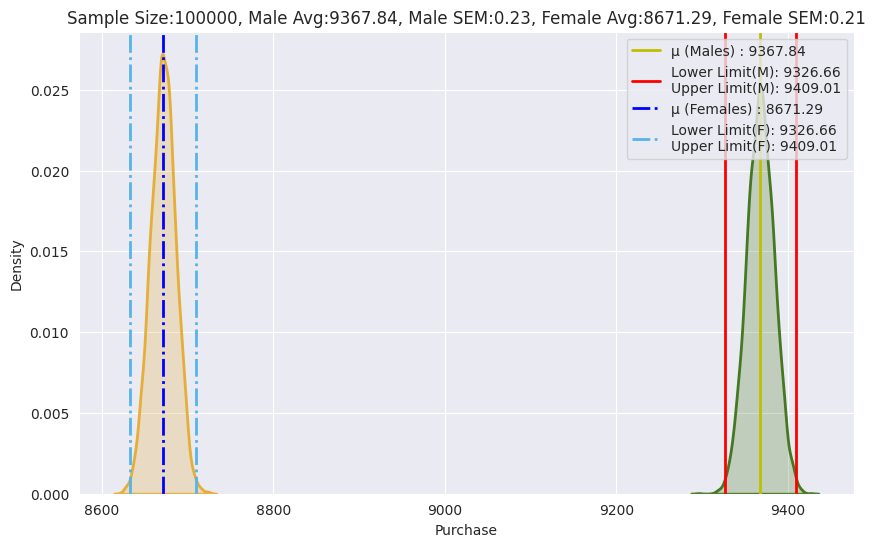

In [ ]:
itr_size = 5000
size_list = [1, 30, 300, 3000, 30000, 100000]
confidence_level = 0.99

array = []

for i in size_list:
    m_avg, f_avg, ll_m, ul_m, ll_f, ul_f = bootstrapping_gender(males_purchase,female_purchase,i,itr_size,confidence_level, 2)

    array.append(['M', ll_m, ul_m, i, ([ll_m,ul_m]) ,(ul_m-ll_m),(confidence_level*100)])
    array.append(['F', ll_f, ul_f, i, ([ll_f,ul_f]) ,(ul_f-ll_f),(confidence_level*100)])

bootstrapped_values_99 = pd.DataFrame(array, columns = ['Gender','Lower_limit','Upper_limit','Sample_Size','CI','Range','Confidence_pct'])
collective = pd.concat([collective, bootstrapped_values_99], axis=0)

In [ ]:
bootstrapped_values_99[bootstrapped_values_99['Gender']=='M']

Gender  Lower_limit  Upper_limit  Sample_Size                    CI  \
0       M     -3376.98     22154.59            1  [-3376.98, 22154.59]   
2       M      7028.23     11693.99           30   [7028.23, 11693.99]   
4       M      8613.75     10111.40          300    [8613.75, 10111.4]   
6       M      9129.92      9607.41         3000    [9129.92, 9607.41]   
8       M      9293.13      9442.02        30000    [9293.13, 9442.02]   
10      M      9326.66      9409.01       100000    [9326.66, 9409.01]   

       Range  Confidence_pct  
0   25531.57            99.0  
2    4665.76            99.0  
4    1497.65            99.0  
6     477.49            99.0  
8     148.89            99.0  
10     82.35            99.0

In [ ]:
bootstrapped_values_99[bootstrapped_values_99['Gender']=='F']

Gender  Lower_limit  Upper_limit  Sample_Size                    CI  \
1       F     -3371.17     20734.58            1  [-3371.17, 20734.58]   
3       F      6446.30     10869.01           30    [6446.3, 10869.01]   
5       F      7963.30      9360.36          300     [7963.3, 9360.36]   
7       F      8449.54      8891.87         3000    [8449.54, 8891.87]   
9       F      8601.04      8741.36        30000    [8601.04, 8741.36]   
11      F      8633.38      8709.20       100000     [8633.38, 8709.2]   

       Range  Confidence_pct  
1   24105.75            99.0  
3    4422.71            99.0  
5    1397.06            99.0  
7     442.33            99.0  
9     140.32            99.0  
11     75.82            99.0

In [ ]:
collective[(collective['Gender']=='M') & (collective['Sample_Size']==100000)]

Gender  Lower_limit  Upper_limit  Sample_Size                  CI  Range  \
10      M      9341.17      9394.20       100000   [9341.17, 9394.2]  53.03   
10      M      9337.05      9398.50       100000   [9337.05, 9398.5]  61.45   
10      M      9326.66      9409.01       100000  [9326.66, 9409.01]  82.35   

    Confidence_pct  
10            90.0  
10            95.0  
10            99.0

In [ ]:
collective[(collective['Gender']=='F') & (collective['Sample_Size']==100000)]

Gender  Lower_limit  Upper_limit  Sample_Size                  CI  Range  \
11      F      8646.98      8695.11       100000  [8646.98, 8695.11]  48.13   
11      F      8642.27      8699.88       100000  [8642.27, 8699.88]  57.61   
11      F      8633.38      8709.20       100000   [8633.38, 8709.2]  75.82   

    Confidence_pct  
11            90.0  
11            95.0  
11            99.0

### Insights:
- Using confidence level 99%, the mean purchase value by gender shows a similar pattern to that found with confidence level 90% and 95%.
- As the sample size increases significantly, both groups becomes more and more distinct.
- As the sample size increases significantly, Standard Error of the means in samples decreases.
- For the sample size >= 300:
  - With sample_size=300, range of purchase mean for female having 99% confidence interval is [7972.12, 9366.43],  whereas with sample_size=100000, range of purchase mean for female having 99% confidence interval is [8632.33, 8709.28].
  - With sample_size=300, range of purchase mean for male having 99%
   confidence interval is [8632.6, 10109.66], whereas with sample_size=100000, range of purchase mean for male having 99% confidence interval is [9327.09, 9407.89].
- As the confidence level increases, the spread of range also increases as for confidence level [90, 95, 99] among females the range spread is given as [58.27, 58.30, 76.95].

## How does Marital_Status affect the amount spent?

In [ ]:
unmarried_purchase = df_v1[df_v1['Marital_Status']==0]['Purchase']
married_purchase = df_v1[df_v1['Marital_Status']==1]['Purchase']

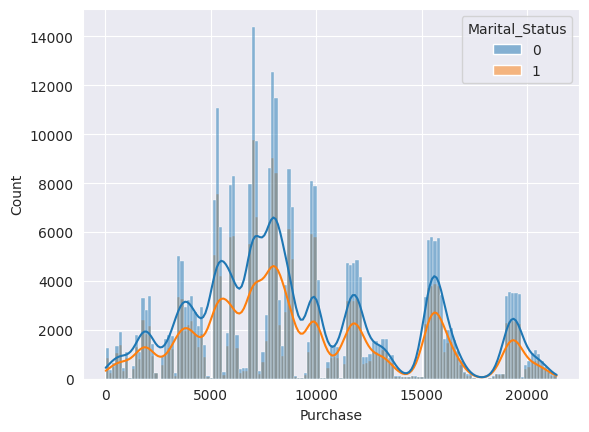

In [ ]:
sns.histplot(data=df_v1, hue='Marital_Status', x='Purchase', kde=True)
plt.show()

In [ ]:
def bootstrapping_marital_status(samp1, samp2, sample_size, iteration_size, confidence_level, no_of_tail):
  samp1_means = np.empty(iteration_size)
  samp2_means = np.empty(iteration_size)
  for i in range(iteration_size):
    samp1_n = np.empty(i)
    samp2_n = np.empty(i)
    samp1_n = np.random.choice(samp1, size=sample_size, replace=True)
    samp2_n = np.random.choice(samp2, size=sample_size, replace=True)
    samp1_means[i] = np.mean(samp1_n)
    samp2_means[i] = np.mean(samp2_n)

  alpha = (1-confidence_level)/no_of_tail
  z_critical = norm.ppf(1-alpha)

  mean1 = np.mean(samp1_means)
  std1 = np.std(samp1_means)
  sem1 = stats.sem(samp1_means)
  lower_limit1 = mean1 - (std1 * z_critical)
  upper_limit1 = mean1 + (std1 * z_critical)

  mean2 = np.mean(samp2_means)
  std2 = np.std(samp2_means)
  sem2 = stats.sem(samp2_means)
  lower_limit2 = mean2 - (std2 * z_critical)
  upper_limit2 = mean2 + (std2 * z_critical)

  fig, ax = plt.subplots(figsize=(10,6))
  sns.set_style("darkgrid")
  sns.kdeplot(data=samp1_means, color='#467821', fill=True, linewidth=2)
  sns.kdeplot(data=samp2_means, color='#e5ae38', fill=True, linewidth=2)

  label_mean1=(f"μ (Married) : {np.round(mean1, 2)}")
  label_ult1=(f"Lower Limit(M): {np.round(lower_limit1, 2)}\nUpper Limit(M): {np.round(upper_limit1, 2)}")
  label_mean2=(f"μ (Unmarried) : {np.round(mean2, 2)}")
  label_ult2=(f"Lower Limit(U): {np.round(lower_limit1, 2)}\nUpper Limit(U): {np.round(upper_limit1, 2)}")

  plt.title(f"Sample Size:{sample_size}, Married Avg:{np.round(mean1, 2)}, Married SEM:{np.round(sem1, 2)}, Unmarried Avg:{np.round(mean2, 2)}, Unmarried SEM:{np.round(sem2, 2)}")
  plt.xlabel("Purchase")
  plt.axvline(mean1, color='y', linestyle='solid', linewidth=2, label=label_mean1)
  plt.axvline(lower_limit1, color='r', linestyle='solid', linewidth=2, label=label_ult1)
  plt.axvline(upper_limit1, color='r', linestyle='solid', linewidth=2)
  plt.axvline(mean2, color='b', linestyle='dashdot', linewidth=2, label=label_mean2)
  plt.axvline(lower_limit2, color='#56B4E9', linestyle='dashdot', linewidth=2, label=label_ult2)
  plt.axvline(upper_limit2, color='#56B4E9', linestyle='dashdot', linewidth=2)
  plt.legend(loc='upper right')
  plt.show()

  return samp1_means, samp2_means, np.round(lower_limit1, 2), np.round(upper_limit1, 2), np.round(lower_limit2, 2), np.round(upper_limit2, 2)

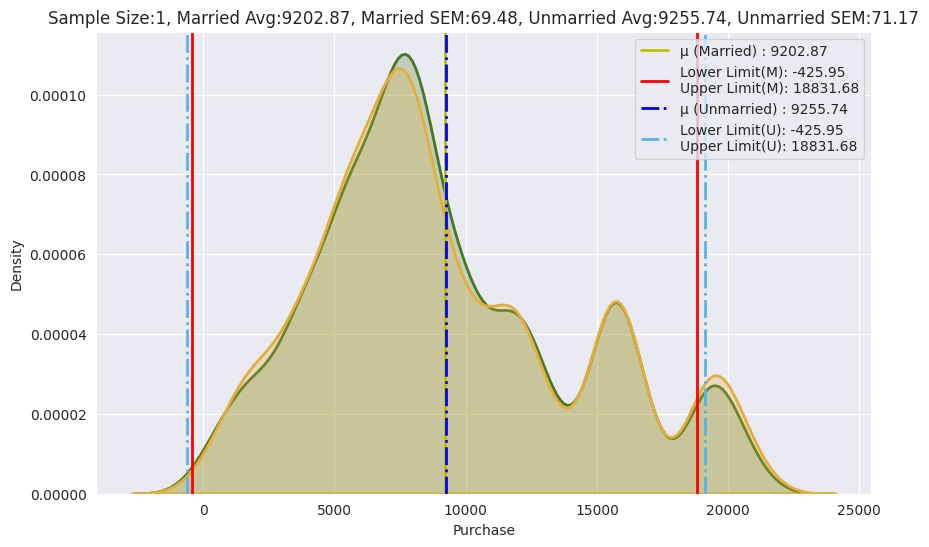

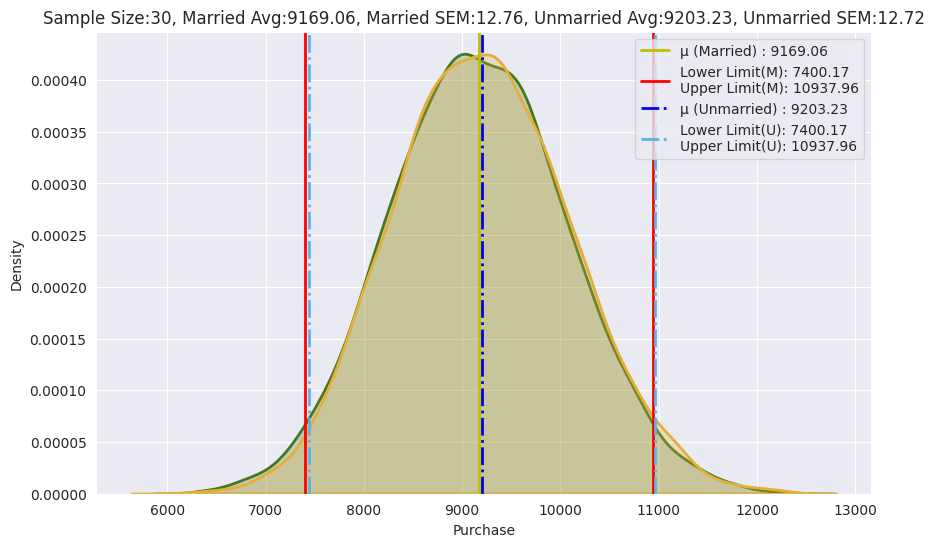

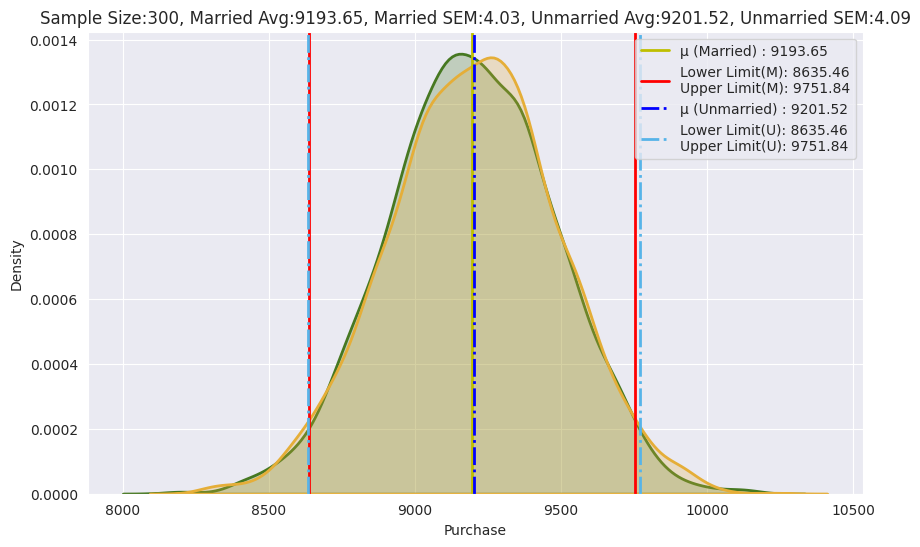

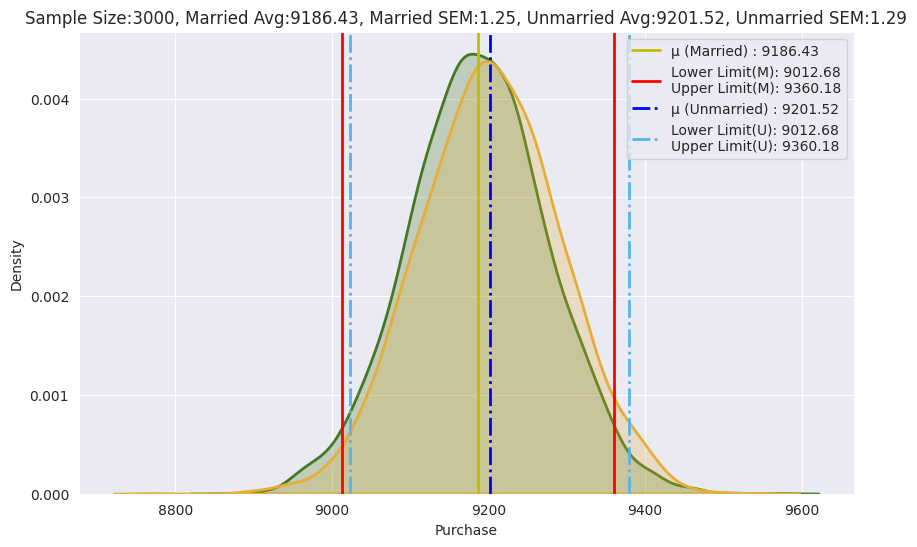

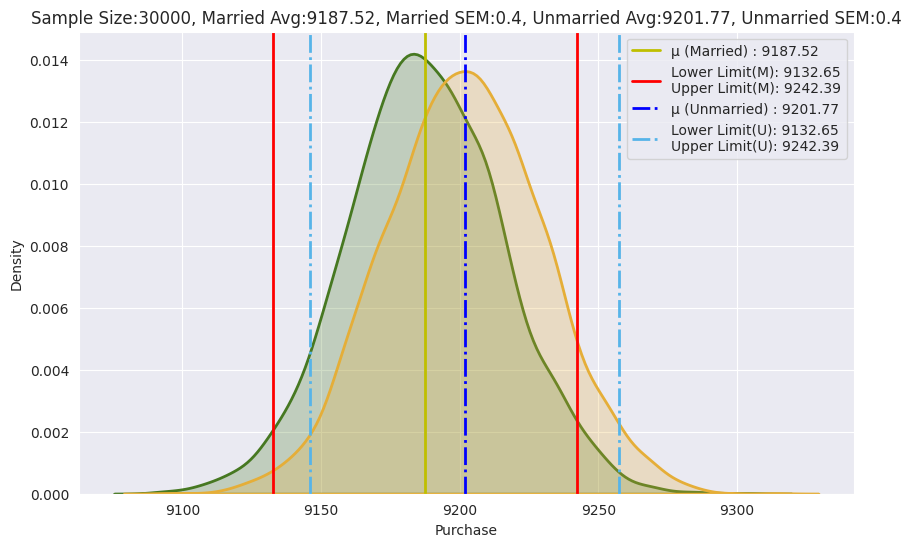

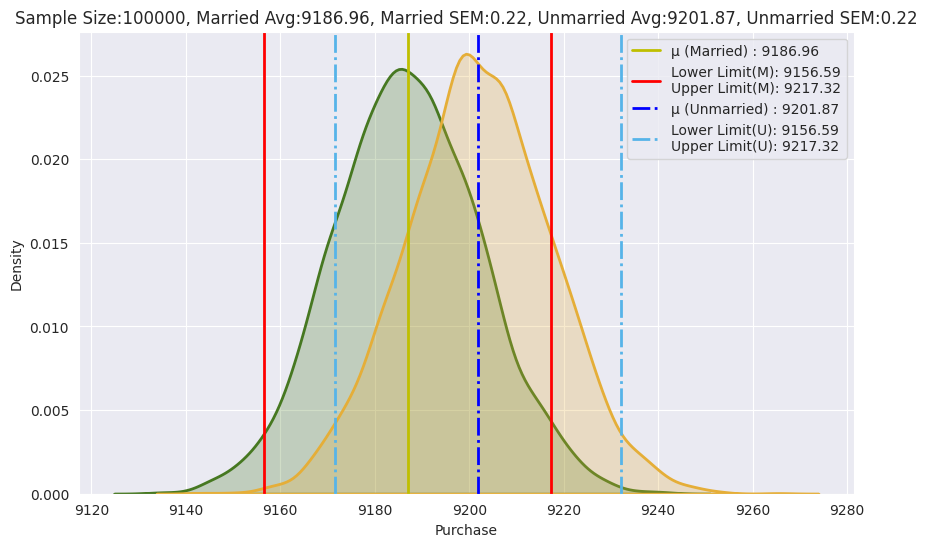

In [ ]:
itr_size = 5000
size_list = [1, 30, 300, 3000, 30000, 100000]
confidence_level = 0.95

array = []

for i in size_list:
    m_avg, u_avg, ll_m, ul_m, ll_u, ul_u = bootstrapping_marital_status(married_purchase, unmarried_purchase, i, itr_size, confidence_level, 2)

    array.append(['Married', ll_m, ul_m, i, ([ll_m,ul_m]) ,(ul_m-ll_m),(confidence_level*100)])
    array.append(['Unmarried', ll_u, ul_u, i, ([ll_u,ul_u]) ,(ul_u-ll_u),(confidence_level*100)])

bootstrapped_values_95 = pd.DataFrame(array, columns = ['Marital_Status','Lower_limit','Upper_limit','Sample_Size','CI','Range','Confidence_pct'])

In [ ]:
bootstrapped_values_95[bootstrapped_values_95['Marital_Status']=='Married']

Marital_Status  Lower_limit  Upper_limit  Sample_Size                   CI  \
0         Married      -425.95     18831.68            1  [-425.95, 18831.68]   
2         Married      7400.17     10937.96           30  [7400.17, 10937.96]   
4         Married      8635.46      9751.84          300   [8635.46, 9751.84]   
6         Married      9012.68      9360.18         3000   [9012.68, 9360.18]   
8         Married      9132.65      9242.39        30000   [9132.65, 9242.39]   
10        Married      9156.59      9217.32       100000   [9156.59, 9217.32]   

       Range  Confidence_pct  
0   19257.63            95.0  
2    3537.79            95.0  
4    1116.38            95.0  
6     347.50            95.0  
8     109.74            95.0  
10     60.73            95.0

In [ ]:
bootstrapped_values_95[bootstrapped_values_95['Marital_Status']=='Unmarried']

Marital_Status  Lower_limit  Upper_limit  Sample_Size                   CI  \
1       Unmarried      -606.52     19118.00            1   [-606.52, 19118.0]   
3       Unmarried      7440.31     10966.15           30  [7440.31, 10966.15]   
5       Unmarried      8634.12      9768.91          300   [8634.12, 9768.91]   
7       Unmarried      9023.24      9379.80         3000    [9023.24, 9379.8]   
9       Unmarried      9145.98      9257.56        30000   [9145.98, 9257.56]   
11      Unmarried      9171.61      9232.13       100000   [9171.61, 9232.13]   

       Range  Confidence_pct  
1   19724.52            95.0  
3    3525.84            95.0  
5    1134.79            95.0  
7     356.56            95.0  
9     111.58            95.0  
11     60.52            95.0

### Insight:
- **Overlapping is evident** between spent amount by married and unmarried, which can be seen even after increasing the sample size with the **confidence level of 95%**.
- With 95% confidence, we can say **married customer** spends amount in range **[8624.43, 9742.62]** for a **sample size of 300** whereas **unmarried customers** for same sample size spend amount in range **[8638.75, 9767.1].**
- With 95% confidence, we can say married customer spends amount in range **[9155.74, 9218.28]**	for a **sample size of 100000**, whereas unmarried customers for the same sample size spend the amount in range **[9171.16, 9232.52]**	.

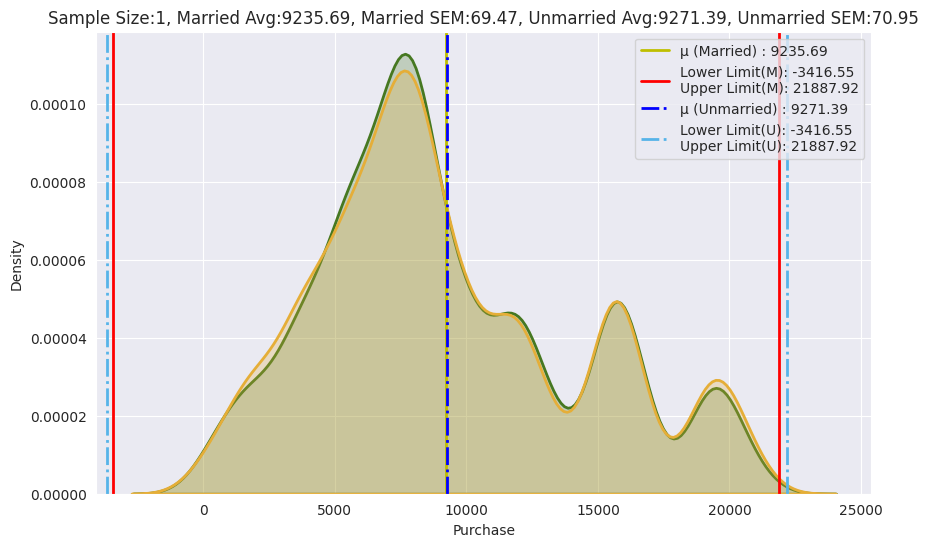

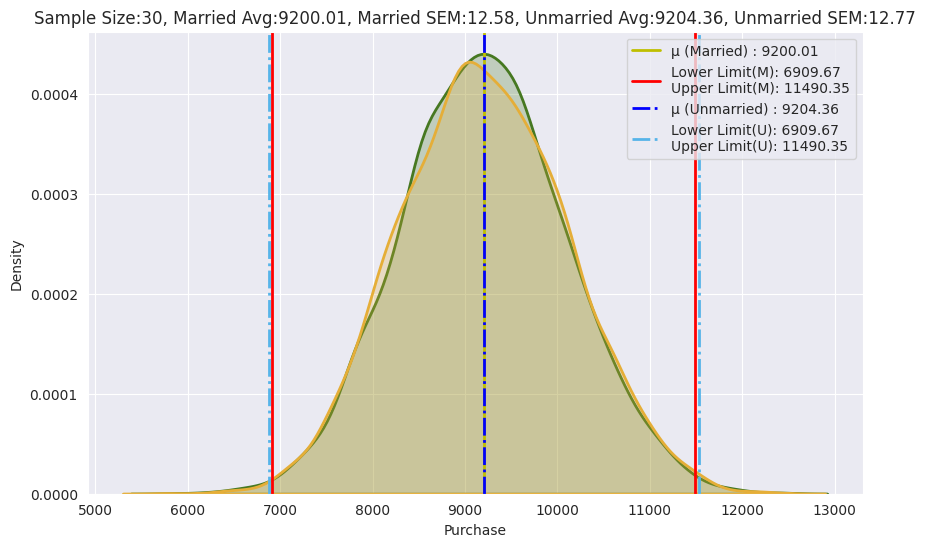

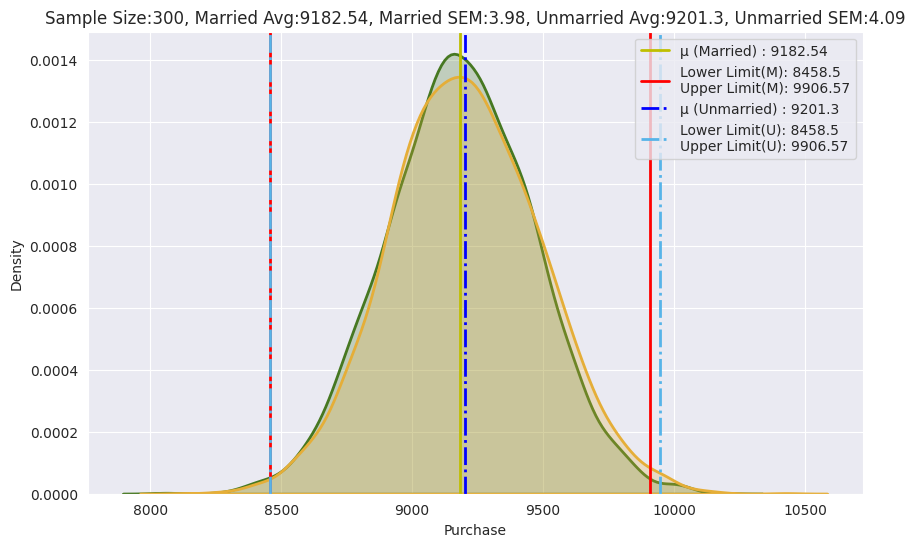

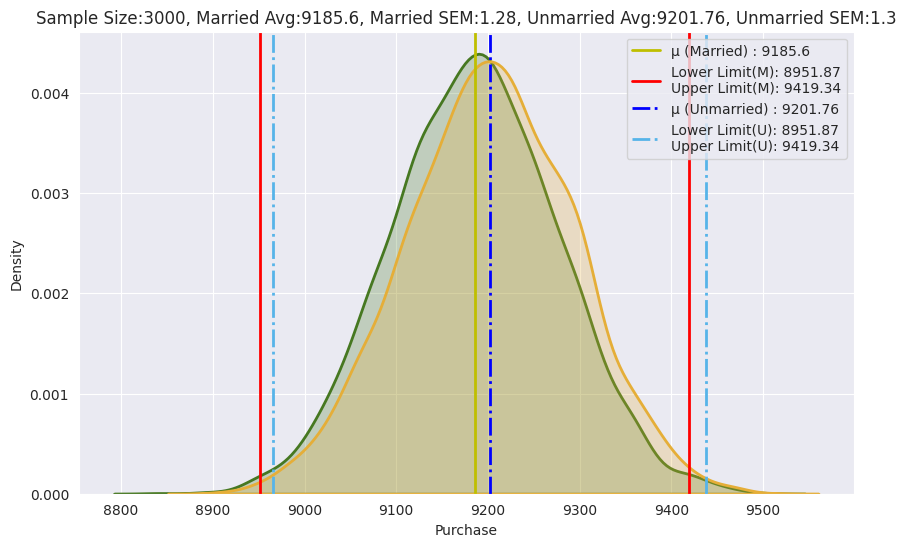

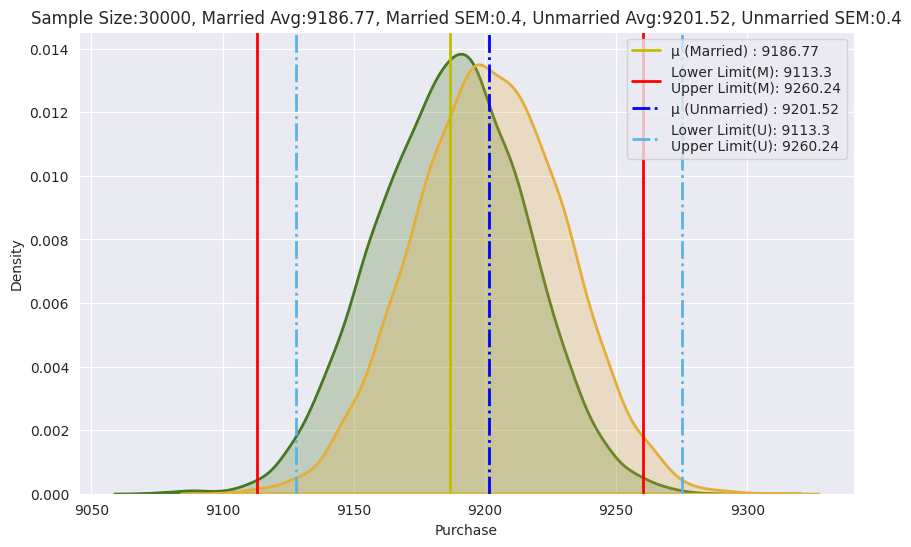

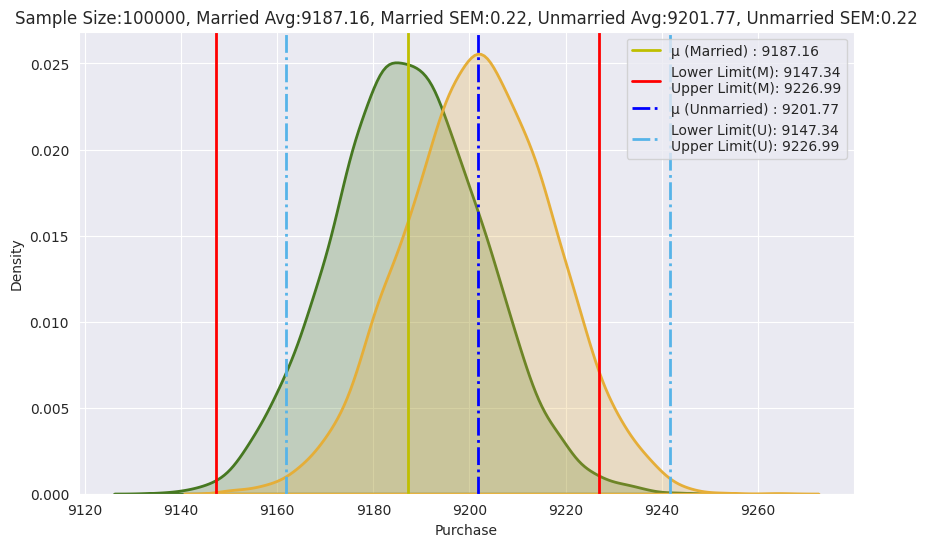

In [ ]:
itr_size = 5000
size_list = [1, 30, 300, 3000, 30000, 100000]
confidence_level = 0.99

array = []

for i in size_list:
    m_avg, u_avg, ll_m, ul_m, ll_u, ul_u = bootstrapping_marital_status(married_purchase, unmarried_purchase, i, itr_size, confidence_level, 2)

    array.append(['Married', ll_m, ul_m, i, ([ll_m,ul_m]) ,(ul_m-ll_m),(confidence_level*100)])
    array.append(['Unmarried', ll_u, ul_u, i, ([ll_u,ul_u]) ,(ul_u-ll_u),(confidence_level*100)])

bootstrapped_values_99 = pd.DataFrame(array, columns = ['Marital_Status','Lower_limit','Upper_limit','Sample_Size','CI','Range','Confidence_pct'])

In [ ]:
bootstrapped_values_99[bootstrapped_values_99['Marital_Status']=='Married']

Marital_Status  Lower_limit  Upper_limit  Sample_Size  \
0         Married     -3416.55     21887.92            1   
2         Married      6909.67     11490.35           30   
4         Married      8458.50      9906.57          300   
6         Married      8951.87      9419.34         3000   
8         Married      9113.30      9260.24        30000   
10        Married      9147.34      9226.99       100000   

                      CI     Range  Confidence_pct  
0   [-3416.55, 21887.92]  25304.47            99.0  
2    [6909.67, 11490.35]   4580.68            99.0  
4      [8458.5, 9906.57]   1448.07            99.0  
6     [8951.87, 9419.34]    467.47            99.0  
8      [9113.3, 9260.24]    146.94            99.0  
10    [9147.34, 9226.99]     79.65            99.0

In [ ]:
bootstrapped_values_99[bootstrapped_values_99['Marital_Status']=='Unmarried']

Marital_Status  Lower_limit  Upper_limit  Sample_Size  \
1       Unmarried     -3650.74     22193.52            1   
3       Unmarried      6878.56     11530.15           30   
5       Unmarried      8457.32      9945.28          300   
7       Unmarried      8965.85      9437.68         3000   
9       Unmarried      9127.95      9275.08        30000   
11      Unmarried      9161.85      9241.69       100000   

                      CI     Range  Confidence_pct  
1   [-3650.74, 22193.52]  25844.26            99.0  
3    [6878.56, 11530.15]   4651.59            99.0  
5     [8457.32, 9945.28]   1487.96            99.0  
7     [8965.85, 9437.68]    471.83            99.0  
9     [9127.95, 9275.08]    147.13            99.0  
11    [9161.85, 9241.69]     79.84            99.0

### Insights:
- Overlapping is evident between spent amount by married and unmarried, which can be seen even after increasing the sample size with the confidence level of 99% same as 95% confidence we observed.
- With 99% confidence, we can say married customer spends amount in range [8461.48, 9919.24] for a sample size of 300 whereas unmarried customers for same sample size spend amount in range [8471.14, 9926.01].
- With 99% confidence, we can say married customer spends amount in range [9147.25, 9227.09] for a sample size of 100000, whereas unmarried customers for the same sample size spend the amount in range [9160.47, 9242.14].

## CLT Analysis for mean purchase with confidence 99% - Based on Age Group

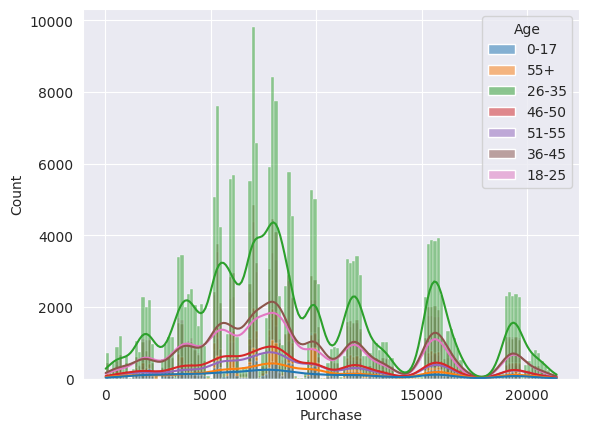

In [ ]:
sns.histplot(data=df_v1, hue='Age', x='Purchase', kde=True)
plt.show()

In [ ]:
def bootstrapping_age(samp1, sample_size, iteration_size, confidence_level, no_of_tail):
  samp1_means = np.empty(iteration_size)

  for i in range(iteration_size):
    samp1_n = np.empty(i)
    samp1_n = np.random.choice(samp1, size=sample_size, replace=True)
    samp1_means[i] = np.mean(samp1_n)

  alpha = (1-confidence_level)/no_of_tail
  z_critical = norm.ppf(1-alpha)

  mean1 = np.mean(samp1_means)
  std1 = np.std(samp1_means)
  sem1 = stats.sem(samp1_means)
  lower_limit1 = mean1 - (std1 * z_critical)
  upper_limit1 = mean1 + (std1 * z_critical)

  return samp1_means, np.round(lower_limit1, 2), np.round(upper_limit1, 2)

In [ ]:
itr_size = 1000
sample_size = 3000
confidence_level= 0.95
age_list =['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+']

array = []

for age in age_list:
  mean, ll_a, ul_a = bootstrapping_age(df_v1[df_v1['Age'] == age]['Purchase'], sample_size, itr_size, confidence_level, 2)

  array.append([age,np.round(mean,2), ll_a, ul_a, sample_size, ([ll_a,ul_a]) ,(ul_a-ll_a), (confidence_level*100)])

age_data_95 = pd.DataFrame(array, columns = ['Age_Group','Mean','Lower_limit','Upper_limit','Sample_Size','CI','Range','Confidence_pct'])

In [ ]:
age_data_95

Age_Group                                               Mean  Lower_limit  \
0      0-17  [8987.64, 9014.89, 8771.51, 8902.61, 8798.16, ...      8684.59   
1     18-25  [9138.96, 9033.03, 9115.78, 9031.49, 9016.71, ...      8951.13   
2     26-35  [9154.61, 9095.9, 9237.3, 9373.45, 9133.35, 91...      9015.16   
3     36-45  [9222.33, 9377.3, 9490.66, 9125.54, 9308.73, 9...      9075.93   
4     46-50  [9121.39, 9260.27, 9054.87, 8989.47, 9184.2, 9...      8947.94   
5     51-55  [9583.97, 9318.76, 9429.8, 9592.73, 9299.76, 9...      9239.27   
6       55+  [9220.45, 9199.07, 9258.85, 9121.02, 9202.41, ...      9038.74   

   Upper_limit  Sample_Size                  CI   Range  Confidence_pct  
0      9046.21         3000  [8684.59, 9046.21]  361.62            95.0  
1      9296.42         3000  [8951.13, 9296.42]  345.29            95.0  
2      9368.39         3000  [9015.16, 9368.39]  353.23            95.0  
3      9434.81         3000  [9075.93, 9434.81]  358.88            95.0  
4      9303.35         3000  [8947.94, 9303.35]  355.41            95.0  
5      9605.56         3000  [9239.27, 9605.56]  366.29            95.0  
6      9384.18         3000  [9038.74, 9384.18]  345.44            95.0

In [ ]:
def plot_age_samples(age_data):
  age_dict ={}
  age_list = ['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+']
  for i in range(len(age_list)):
    age_dict[age_list[i]] = age_data.loc[i, 'Mean']

  fig, ax = plt.subplots(figsize=(10,6))
  sns.set_style("darkgrid")
  for i in age_dict.keys():
    sns.kdeplot(data=age_dict[i], shade=True, fill=True, linewidth=2, label=i)


  plt.title(f"Sample Distribution of a sample mean for each age")
  plt.xlabel("Purchase")

  plt.legend(loc='upper right')
  plt.show()

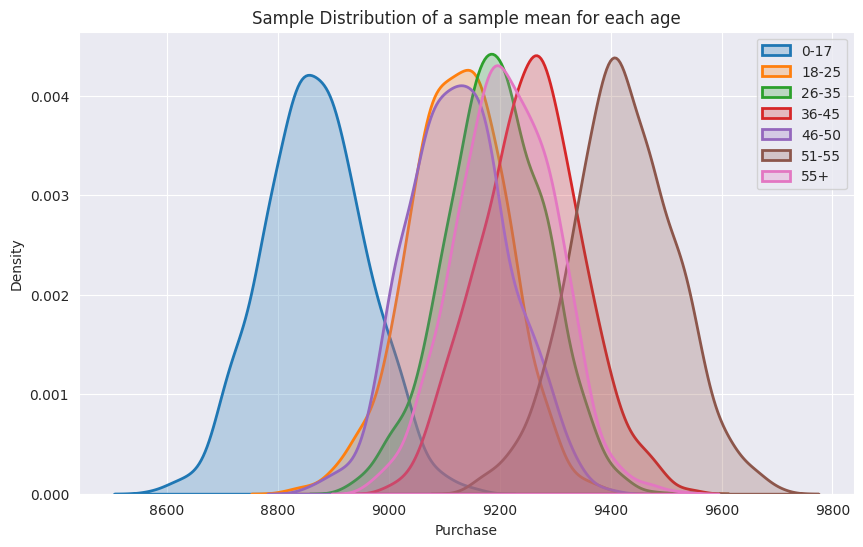

In [ ]:
plot_age_samples(age_data_95)

In [ ]:
itr_size = 1000
sample_size = 3000
confidence_level= 0.99
age_list =['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+']

array = []

for age in age_list:
  mean, ll_a, ul_a = bootstrapping_age(df_v1[df_v1['Age'] == age]['Purchase'], sample_size, itr_size, confidence_level, 2)

  array.append([age,np.round(mean,2), ll_a, ul_a, sample_size, ([ll_a,ul_a]) ,(ul_a-ll_a), (confidence_level*100)])

age_data_99_3000 = pd.DataFrame(array, columns = ['Age_Group','Mean','Lower_limit','Upper_limit','Sample_Size','CI','Range','Confidence_pct'])

In [ ]:
age_data_99_3000

Age_Group                                               Mean  Lower_limit  \
0      0-17  [8874.84, 8654.9, 9043.89, 8922.2, 8808.54, 88...      8629.78   
1     18-25  [8962.31, 9190.85, 9219.11, 9136.6, 9029.09, 8...      8898.94   
2     26-35  [9150.98, 9134.64, 9195.54, 9192.94, 9271.44, ...      8959.03   
3     36-45  [9220.62, 9350.68, 9150.86, 9369.1, 9207.35, 9...      9025.59   
4     46-50  [9114.9, 9010.17, 9274.52, 9110.83, 8955.16, 9...      8900.43   
5     51-55  [9314.36, 9291.16, 9309.18, 9397.14, 9228.83, ...      9182.33   
6       55+  [9046.72, 9337.85, 9079.64, 9173.4, 9254.16, 9...      8995.38   

   Upper_limit  Sample_Size                  CI   Range  Confidence_pct  
0      9106.11         3000  [8629.78, 9106.11]  476.33            99.0  
1      9354.63         3000  [8898.94, 9354.63]  455.69            99.0  
2      9434.97         3000  [8959.03, 9434.97]  475.94            99.0  
3      9489.74         3000  [9025.59, 9489.74]  464.15            99.0  
4      9358.67         3000  [8900.43, 9358.67]  458.24            99.0  
5      9659.73         3000  [9182.33, 9659.73]  477.40            99.0  
6      9440.67         3000  [8995.38, 9440.67]  445.29            99.0

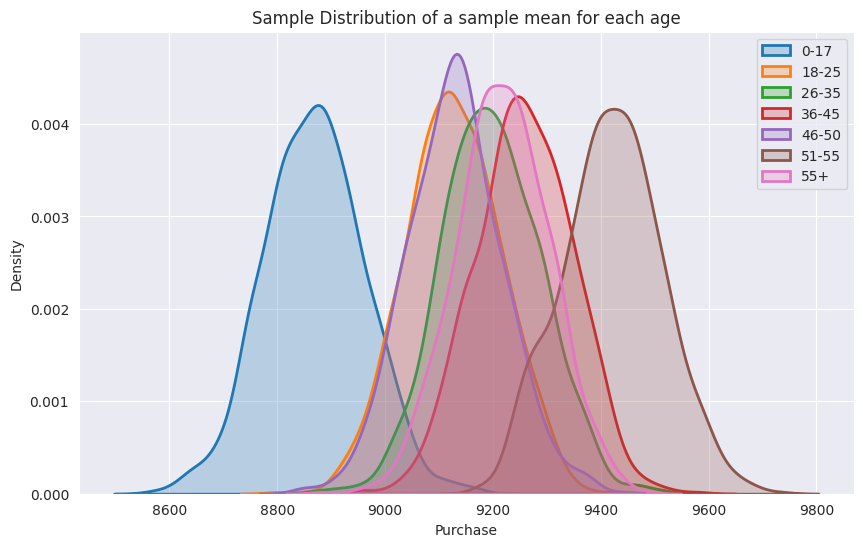

In [ ]:
plot_age_samples(age_data_99_3000)

In [ ]:
itr_size = 1000
sample_size = 30000
confidence_level= 0.99
age_list =['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+']

array = []

for age in age_list:
  mean, ll_a, ul_a = bootstrapping_age(df_v1[df_v1['Age'] == age]['Purchase'], sample_size, itr_size, confidence_level, 2)

  array.append([age,np.round(mean,2), ll_a, ul_a, sample_size, ([ll_a,ul_a]) ,(ul_a-ll_a), (confidence_level*100)])

age_data_99_30000 = pd.DataFrame(array, columns = ['Age_Group','Mean','Lower_limit','Upper_limit','Sample_Size','CI','Range','Confidence_pct'])

In [ ]:
age_data_99_30000

Age_Group                                               Mean  Lower_limit  \
0      0-17  [8851.33, 8922.64, 8794.39, 8839.03, 8899.14, ...      8793.48   
1     18-25  [9184.97, 9163.56, 9086.26, 9168.28, 9142.97, ...      9045.61   
2     26-35  [9179.4, 9209.84, 9125.25, 9209.5, 9215.72, 92...      9120.58   
3     36-45  [9295.28, 9230.23, 9223.88, 9264.93, 9245.05, ...      9181.15   
4     46-50  [9159.06, 9111.72, 9173.31, 9110.83, 9132.3, 9...      9056.72   
5     51-55  [9404.43, 9438.82, 9429.62, 9427.4, 9394.05, 9...      9350.48   
6       55+  [9182.7, 9257.38, 9219.85, 9256.84, 9216.51, 9...      9143.81   

   Upper_limit  Sample_Size                  CI   Range  Confidence_pct  
0      8944.63        30000  [8793.48, 8944.63]  151.15            99.0  
1      9201.09        30000  [9045.61, 9201.09]  155.48            99.0  
2      9267.44        30000  [9120.58, 9267.44]  146.86            99.0  
3      9327.07        30000  [9181.15, 9327.07]  145.92            99.0  
4      9202.63        30000  [9056.72, 9202.63]  145.91            99.0  
5      9496.88        30000  [9350.48, 9496.88]  146.40            99.0  
6      9289.46        30000  [9143.81, 9289.46]  145.65            99.0

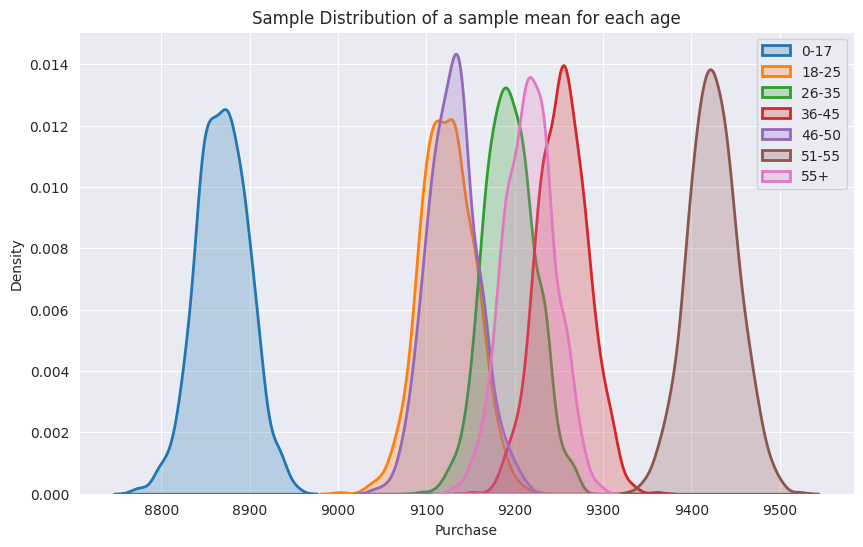

In [ ]:
plot_age_samples(age_data_99_30000)

### Insights:
- customers within **age range of 0-17 spends least** among all age groups with a range of **[8687.64, 9052.0]** with **95% confidence** for **sample size of 3000** which is similar even when we change confidence level to 99% - **[8629.78, 9106.11]** but while looking looking for **sample size of 30000** we can observe the range getting narrowing to **[8793.48, 8944.63]** for **confidence level of 99%**.
- customers within **age range of 51-55** spends least among all age groups with a range of **[9241.17, 9608.04]** with 95% confidence for sample size of 3000 whereas while looking looking for **sample size of 30000** we can observe the range getting narrowing to **[9350.48, 9496.88]** for **confidence level of 99%**.


# Summary Based on EDA


- The majority of our customers resides in city category B but customers from **City category C spends more** amount of money as mean is 9719.
- Customers are mostly in the range of **26-35 years** (**2k+ unique customers**), followed by 36-45 and 18-25 age ranges (**both 1k+ unique customers**).
- There are **more unmarried customers** than married in the given dataset.
- The majority of unique users live in  City Category C, but more people from City Category B tends to purchase, which suggests the **same users visits multiple times in City Category B**.
- **Majority of Customers** purchase products within the amount **range of 5,000 - 20,000**.
- Males has done more shopping than Female customers as data contains almost 75% males and 25% females.
- Single customers do shopping more often as compared to Married customers.
- **Males** buy more product from category - **1, followed by 5 and 8** whereas **Females** buy more from category - **5, followed by 8 and 1**.
- Most customers are between the ages of 26 and 35. **60% of all purchases** are made by people between the **ages of 26 and 45**.
- Most mall customers are between the ages of 26 and 35.City category C has more customers between the ages of 18 and 45.
- In City Category C, there are slightly more female customers.
- Product 5 and 8 is common among females.

# Summary based on Statistical Analysis:

- Using confidence level 99%, the **mean purchase** value **by gender** shows a **similar pattern** to that found with confidence level 90% and 95%.
- As the **sample size increases** significantly, both groups becomes more and more **distinct**.
- As the sample size increases significantly, **Standard Error** of the means in samples **decreases**.
- Overlappings are increasing with a confidence level of 95%. Due to the increasing confidence, we consider higher ranges within which the actual population mean might fall, so that both mean purchases are most likely to fall within the same range.
- With **sample_size=300**, range of purchase mean for **female having 99%** confidence interval is **[7972.12, 9366.43]**,  whereas with **sample_size=100000**, range of purchase mean for female having 99% confidence interval is **[8632.33, 8709.28]**.
- With **sample_size=300**, range of purchase mean for **male having 99%**
   confidence interval is **[8632.6, 10109.66]**, whereas with **sample_size=100000**, range of purchase mean for male having 99% confidence interval is **[9327.09, 9407.89]**.
- As the **confidence level increases**, the **spread of range also increases** as for confidence level [90, 95, 99] among females the range spread is given as [58.27, 58.30, 76.95].
- **Overlapping is evident** between spent amount by married and unmarried, which can be seen even after increasing the sample size with the **confidence level of 95%**, which indicates that customers spend the same regardless of whether they are single or married.
- With 95% confidence, we can say **married customer** spends amount in range **[8624.43, 9742.62]** for a **sample size of 300** whereas **unmarried customers** for same sample size spend amount in range **[8638.75, 9767.1].**
- With 95% confidence, we can say married customer spends amount in range **[9155.74, 9218.28]**	for a **sample size of 100000**, whereas unmarried customers for the same sample size spend the amount in range **[9171.16, 9232.52]**
- customers within **age range of 0-17 spends least** among all age groups with a range of **[8687.64, 9052.0]** with **95% confidence**.
- customers within **age range of 51-55** spends most among all age groups with a range of **[9241.17, 9608.04]** with 95% confidence.

# Recommendations:
- **Targeted Marketing by City category**:
  - Focus marketing efforts on City Category C **due to higher spending** by customers. However, consider that City Category B also have repeat customers, so maintaining engagement with them is crucial.
- **Age-Based Marketing Strategies**:
  - Since customers **aged between 26 and 35** make up the majority and contribute significantly to purchases, **tailor marketing campaigns** and product offerings to cater to this age group's preferences.
  - Consider special promotions or **loyalty programs** targeting customers **aged 36-45** as they also represent a substantial portion of the customer base.
- **Gender-Based Product Placement**:
  - Place products from Category 1 prominently for male customers, as they show a preference for it. Similarly, allocate shelf space for Category 5 and 8 products for female customers.
- **Encourage Repeat Purchases**:
  - Implement loyalty programs or personalized offers to encourage repeat purchases, **especially among single customers** who tend to shop more frequently.
- **Understanding Purchasing Patterns**:
  - Recognize that there's significant overlap in spending between married and unmarried customers. Hence, marketing strategies should not focus on marital status but rather on other factors like age, gender and city category.
- **Adjust Pricing Strategies**:
  - Consider adjusting pricing strategies for different age groups. For example, older customers (51-55 age range) seem to spend more, so premium products or services could be marketed towards them.
- **Expand Product Range**:
  - Consider expanding the product range in categories 5 and 8 to attract more female customers and capitalize on their preferences.